In [1]:
!nvidia-smi   # 看看 GPU 有沒有被偵測到

!pip install --upgrade pip
!pip install chemprop



Tue Dec  9 23:13:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:1E.0 Off |                    0 |
| N/A   23C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 115.5 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 50.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 31.8 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 44.0 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 39.2 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 42.6 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 47.2 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 43

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device() if torch.cuda.is_available() else None)



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


CUDA available: True
GPU count: 1
Current device: 0


In [3]:
import pandas as pd

df_reg = pd.read_csv("series4_processed_regression.csv")
print(df_reg.columns)
df_reg.head()


Index(['smiles', 'norm_activity'], dtype='object')


smiles  norm_activity
0  O=C(/C(S/1)=C/C2=C(C)N(C(C)=C2)C3=CC=C(S(=O)(N...       0.296178
1  O=C(/C(S/1)=C/C2=C(C)N(C(C)=C2)C3=CC=C(C#N)C=C...       0.452229
2  O=C(/C(S/1)=C/C2=C(C)N(C(C)=C2)C3=CC=C(I)C=C3)...       0.796178
3  FC(C(F)=C1)=CC=C1CCOC2=CC=CC3=NN=C(C4=CC=C(C#N...       0.305732
4  ClC(C=CC=C1)=C1CCOC2=CC=CC3=NN=C(C4=CC=C(C#N)C...       0.242038

In [4]:
!pip install --force-reinstall "torch==2.5.1" --index-url https://download.pytorch.org/whl/cu124


Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 25.0 MB/s  0:00:11:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 186.2 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 106.8 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 248.0 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 34.0 MB/s  0:00:08:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 67.5 MB/s  0:00:04:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 90.2 MB/s  0:00:02:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 56.7 MB/s  0:00:00m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 66.3 MB/s  0:00:01:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 62.4 MB/s  0:00:03:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 85.9 MB/s

  Attempting uninstall: nvidia-nvjitlink-cu12━━━━━━━━━━━━━━━━━  2/22 [sympy]
    Found existing installation: nvidia-nvjitlink-cu12 12.4.127  2/22 [sympy]
    Uninstalling nvidia-nvjitlink-cu12-12.4.127:━━━━━━━━━━━━━━  2/22 [sympy]
      Successfully uninstalled nvidia-nvjitlink-cu12-12.4.127━  2/22 [sympy]
  Attempting uninstall: nvidia-nccl-cu12━━━━━━━━━━━━━━━━━━━━━━━━━━  4/22 [nvidia-nvjitlink-cu12]
    Found existing installation: nvidia-nccl-cu12 2.21.5━━━━━━  4/22 [nvidia-nvjitlink-cu12]
    Uninstalling nvidia-nccl-cu12-2.21.5:━━━━━━━━━━━━━━━━━━━━━  4/22 [nvidia-nvjitlink-cu12]
      Successfully uninstalled nvidia-nccl-cu12-2.21.5━━━━━━━━  4/22 [nvidia-nvjitlink-cu12]
  Attempting uninstall: nvidia-curand-cu12━━━━━━━━━━━━━━━━━━━━━━━━  5/22 [nvidia-nccl-cu12]]
    Found existing installation: nvidia-curand-cu12 10.3.5.147  5/22 [nvidia-nccl-cu12]
    Uninstalling nvidia-curand-cu12-10.3.5.147:━━━━━━━━━━━━━━━  5/22 [nvidia-nccl-cu12]
      Successfully uninstalled nvidia-curand-c

In [5]:
import torch
print("torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())


torch version: 2.6.0+cu124
CUDA available: True
GPU count: 1


In [6]:
!pip install --force-reinstall "torch==2.6.0"


  Using cached torch-2.6.0-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using 

In [7]:
import torch
print("torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())


torch version: 2.6.0+cu124
CUDA available: True
GPU count: 1


In [8]:
!sed -n '100,130p' /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/chemprop/utils.py



    :param path: Path where checkpoint is saved.
    :param device: Device where the model will be moved.
    :param logger: A logger for recording output.
    :return: The loaded :class:`~chemprop.models.model.MoleculeModel`.
    """
    if logger is not None:
        debug, info = logger.debug, logger.info
    else:
        debug = info = print

    # Load model and args
    state = torch.load(path, map_location=lambda storage, loc: storage)
    args = TrainArgs()
    args.from_dict(vars(state["args"]), skip_unsettable=True)
    loaded_state_dict = state["state_dict"]

    if device is not None:
        args.device = device

    # Build model
    model = MoleculeModel(args)
    model_state_dict = model.state_dict()

    # Skip missing parameters and parameters of mismatched size
    pretrained_state_dict = {}
    for loaded_param_name in loaded_state_dict.keys():
        # Backward compatibility for parameter names
        if re.match(r"(encoder\.encoder\.)([Wc])", loaded_param_name

In [9]:
path = "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/chemprop/utils.py"

with open(path, "r") as f:
    text = f.read()

old = "    state = torch.load(path, map_location=lambda storage, loc: storage)"
new = "    state = torch.load(path, map_location=lambda storage, loc: storage, weights_only=False)"

if old not in text:
    print("⚠️ 找不到要替換的那一行，先再給我看一次 sed 的輸出")
else:
    text = text.replace(old, new)
    with open(path, "w") as f:
        f.write(text)
    print("✅ 已經把 load_checkpoint 改成 weights_only=False")


✅ 已經把 load_checkpoint 改成 weights_only=False


In [10]:
!sed -n '100,130p' /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/chemprop/utils.py



    :param path: Path where checkpoint is saved.
    :param device: Device where the model will be moved.
    :param logger: A logger for recording output.
    :return: The loaded :class:`~chemprop.models.model.MoleculeModel`.
    """
    if logger is not None:
        debug, info = logger.debug, logger.info
    else:
        debug = info = print

    # Load model and args
    state = torch.load(path, map_location=lambda storage, loc: storage, weights_only=False)
    args = TrainArgs()
    args.from_dict(vars(state["args"]), skip_unsettable=True)
    loaded_state_dict = state["state_dict"]

    if device is not None:
        args.device = device

    # Build model
    model = MoleculeModel(args)
    model_state_dict = model.state_dict()

    # Skip missing parameters and parameters of mismatched size
    pretrained_state_dict = {}
    for loaded_param_name in loaded_state_dict.keys():
        # Backward compatibility for parameter names
        if re.match(r"(encoder\.encoder\.)([Wc])

In [11]:
!rm -rf chemprop_series4_reg_paper


In [13]:
!chemprop_train \
  --data_path series4_processed_regression.csv \
  --dataset_type regression \
  --target_columns norm_activity \
  --smiles_columns smiles \
  --save_dir chemprop_series4_reg_paper \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric mae \
  --epochs 40 \
  --gpu 0


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_processed_regression.csv --dataset_type regression --target_columns norm_activity --smiles_columns smiles --save_dir chemprop_series4_reg_paper --split_type scaffold_balanced --num_folds 5 --ensemble_size 3

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  4.05it/s]Loss = 7.6971e-01, PNorm = 34.2368, GNorm = 8.9672, lr_0 = 5.3899e-04

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.168727
 30%|████████████▉                              | 12/40 [00:13<00:28,  1.04s/it]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 12.10it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.221177
 32%|█████████████▉                             | 13/40 [00:1

 80%|████████████████████████████████████         | 4/5 [00:01<00:00,  3.05it/s]Loss = 6.7417e-01, PNorm = 34.3827, GNorm = 1.5702, lr_0 = 2.9405e-04

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.55it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.167729
 55%|███████████████████████▋                   | 22/40 [00:23<00:19,  1.11s/it]Epoch 22

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  4.37it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]
                                                                                Validation mae = 0.200244
 57%|████████████████████████▋                  | 23/40 [00:2

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.32it/s]Loss = 6.0431e-01, PNorm = 34.5270, GNorm = 0.6184, lr_0 = 1.0000e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.49it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.56it/s]
                                                                                Validation mae = 0.185280
100%|███████████████████████████████████████████| 40/40 [00:42<00:00,  1.05s/it]
Model 0 best validation mae = 0.161368 on epoch 16
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 11.94it/s]Loss = 7.4398e-01, PNorm = 34.3127, GNorm = 4.3733, lr_0 = 3.7470e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.164713
 45%|███████████████████▎                       | 18/40 [00:16<00:19,  1.10it/s]Epoch 18

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.71it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.20it/s]
                                                                                Validation mae = 0.190545
 48%|████████████████████▍                      | 19/40 [00:17<00:19,  1.08it/s]Epoch 19

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.32it/s]Loss = 6.1378e-01, PNorm = 34.4949, GNorm = 1.2709, lr_0 = 1.1152e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.184872
 95%|████████████████████████████████████████▊  | 38/40 [00:35<00:01,  1.32it/s]Epoch 38

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.37it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  9.77it/s]
                                                                                Validation mae = 0.183508
 98%|█████████████████████████████████████████▉ | 39/40 [00:36<00:00,  1.40it/s]Epoch 39

 80%|████████████████████████████████████         | 

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.62it/s]
                                                                                Validation mae = 0.217139
 15%|██████▌                                     | 6/40 [00:05<00:35,  1.04s/it]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.36it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.198332
 18%|███████▋                                    | 7/40 [00:06<00:30,  1.08it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  6.21it/s]Loss = 8.8524e-01, PNorm = 34.1112, GNorm = 1.3518, lr_0 = 6.8682e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  4.70it/s]
                                                      

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  6.14it/s]Loss = 7.5908e-01, PNorm = 34.2333, GNorm = 1.5028, lr_0 = 4.2298e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.55it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]
                                                                                Validation mae = 0.169297
 40%|█████████████████▏                         | 16/40 [00:16<00:26,  1.11s/it]Epoch 16

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.77it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.174094
 42%|██████████████████▎                        | 17/40 [00:1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 12.99it/s]Loss = 7.0235e-01, PNorm = 34.3484, GNorm = 2.0442, lr_0 = 2.3076e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.177651
 65%|███████████████████████████▉               | 26/40 [00:25<00:12,  1.14it/s]Epoch 26

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 10.09it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.173493
 68%|█████████████████████████████              | 27/40 [00:25<00:10,  1.28it/s]Epoch 27

 80%|████████████████████████████████████         | 

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  9.27it/s]
                                                                                Validation mae = 0.197395
 88%|█████████████████████████████████████▋     | 35/40 [00:35<00:05,  1.07s/it]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  5.28it/s]Loss = 6.4953e-01, PNorm = 34.4200, GNorm = 2.3960, lr_0 = 1.2589e-04

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  5.62it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.45it/s]
                                                                                Validation mae = 0.183692
 90%|██████████████████████████████████████▋    | 36/40 [00:36<00:04,  1.12s/it]Epoch 36

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.57it/s]
                                                    

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.294466
  2%|█                                           | 1/40 [00:01<00:41,  1.07s/it]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:01<00:00,  4.04it/s]Loss = 1.0033e+00, PNorm = 34.0199, GNorm = 5.8088, lr_0 = 9.8795e-04

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.19it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  7.28it/s]
                                                                                Validation mae = 0.271886
  5%|██▏                                         | 2/40 [00:02<00:48,  1.28s/it]Epoch 2

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.16it/s]
                                                      

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.31it/s]
                                                                                Validation mae = 0.215927
 28%|███████████▊                               | 11/40 [00:10<00:29,  1.01s/it]Epoch 11

 60%|███████████████████████████                  | 3/5 [00:00<00:00,  8.34it/s]Loss = 7.6295e-01, PNorm = 34.2106, GNorm = 1.5739, lr_0 = 5.3899e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 10.38it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.208654
 30%|████████████▉                              | 12/40 [00:11<00:24,  1.13it/s]Epoch 12

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.96it/s]
                                                    

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.196920
 72%|███████████████████████████████▏           | 29/40 [00:29<00:11,  1.05s/it]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.32it/s]Loss = 6.3159e-01, PNorm = 34.4331, GNorm = 3.5843, lr_0 = 1.8109e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.193420
 75%|████████████████████████████████▎          | 30/40 [00:29<00:08,  1.16it/s]Epoch 30

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  9.45it/s]
                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 11.84it/s]Loss = 6.1324e-01, PNorm = 34.4919, GNorm = 9.4163, lr_0 = 1.0000e-04

                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.41it/s]
                                                                                Validation mae = 0.193344
100%|███████████████████████████████████████████| 40/40 [00:39<00:00,  1.02it/s]
Model 0 best validation mae = 0.192743 on epoch 34
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.we

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 10.11it/s]Loss = 6.9564e-01, PNorm = 34.2884, GNorm = 2.4304, lr_0 = 3.7470e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.201142
 45%|███████████████████▎                       | 18/40 [00:16<00:16,  1.36it/s]Epoch 18

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.01it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.23it/s]
                                                                                Validation mae = 0.196948
 48%|████████████████████▍                      | 19/40 [00:18<00:22,  1.08s/it]Epoch 19

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.89it/s]Loss = 6.3299e-01, PNorm = 34.3997, GNorm = 3.0874, lr_0 = 2.0442e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.191569
 70%|██████████████████████████████             | 28/40 [00:26<00:10,  1.14it/s]Epoch 28

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.38it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.190901
 72%|███████████████████████████████▏           | 29/40 [00:28<00:10,  1.01it/s]Epoch 29

 60%|███████████████████████████                  | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.259819
 12%|█████▌                                      | 5/40 [00:04<00:25,  1.35it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:01<00:00,  2.85it/s]Loss = 8.8758e-01, PNorm = 34.0913, GNorm = 3.0624, lr_0 = 7.7531e-04

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  2.98it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.249376
 15%|██████▌                                     | 6/40 [00:05<00:37,  1.09s/it]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.26it/s]
                                                      

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.17it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.215133
 38%|████████████████▏                          | 15/40 [00:17<00:32,  1.29s/it]Epoch 15

 60%|███████████████████████████                  | 3/5 [00:00<00:00, 10.82it/s]Loss = 7.3529e-01, PNorm = 34.2397, GNorm = 0.7553, lr_0 = 4.2298e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  9.97it/s]
                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.95it/s]
                                                                                Validation mae = 0.210627
 40%|█████████████████▏                         | 16/40 [00:1

                                                                                Validation mae = 0.192632
 85%|████████████████████████████████████▌      | 34/40 [00:35<00:06,  1.05s/it]Epoch 34

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 11.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.191071
 88%|█████████████████████████████████████▋     | 35/40 [00:35<00:04,  1.11it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  6.98it/s]Loss = 6.3522e-01, PNorm = 34.4360, GNorm = 2.0447, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                    

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.68it/s]Loss = 6.9787e-01, PNorm = 34.2723, GNorm = 2.2128, lr_0 = 4.2298e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.269408
 40%|█████████████████▏                         | 16/40 [00:06<00:09,  2.45it/s]Epoch 16

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.81it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.287169
 42%|██████████████████▎                        | 17/40 [00:06<00:09,  2.45it/s]Epoch 17

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.276332
 70%|██████████████████████████████             | 28/40 [00:11<00:05,  2.39it/s]Epoch 28

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.269303
 72%|███████████████████████████████▏           | 29/40 [00:12<00:04,  2.41it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 6.3013e-01, PNorm = 34.4080, GNorm = 2.6982, lr_0 = 1.8109e-04

                                                                                
  0%|                                               

Model 0 test mae = 0.237470                                                     
Building model 1
MoleculeModel(
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/40 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]
                                                  

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.267215
 62%|██████████████████████████▉                | 25/40 [00:10<00:06,  2.45it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]Loss = 6.3617e-01, PNorm = 34.3389, GNorm = 1.3662, lr_0 = 2.3076e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.286766
 65%|███████████████████████████▉               | 26/40 [00:10<00:05,  2.45it/s]Epoch 26

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 5.9958e-01, PNorm = 34.4092, GNorm = 4.4926, lr_0 = 1.1152e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.272440
 95%|████████████████████████████████████████▊  | 38/40 [00:15<00:00,  2.48it/s]Epoch 38

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.271985
 98%|█████████████████████████████████████████▉ | 39/40 [00:16<00:00,  2.48it/s]Epoch 39

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.81it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.277595
 52%|██████████████████████▌                    | 21/40 [00:08<00:07,  2.46it/s]Epoch 21

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.80it/s]Loss = 6.7045e-01, PNorm = 34.2953, GNorm = 3.6808, lr_0 = 2.9405e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.276511
 55%|███████████████████████▋                   | 22/40 [00:08<00:07,  2.45it/s]Epoch 22

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.67it/s]Loss = 9.6579e-01, PNorm = 34.0259, GNorm = 6.0077, lr_0 = 9.8795e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.230330
  5%|██▏                                         | 2/40 [00:00<00:15,  2.42it/s]Epoch 2

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.208594
  8%|███▎                                        | 3/40 [00:01<00:15,  2.43it/s]Epoch 3

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.176846
 68%|█████████████████████████████              | 27/40 [00:11<00:05,  2.36it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 6.2913e-01, PNorm = 34.4700, GNorm = 4.3416, lr_0 = 2.0442e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.177052
 70%|██████████████████████████████             | 28/40 [00:11<00:05,  2.38it/s]Epoch 28

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 9.0742e-01, PNorm = 34.1647, GNorm = 4.4790, lr_0 = 6.0843e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.184388
 25%|██████████▊                                | 10/40 [00:04<00:12,  2.31it/s]Epoch 10

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.184654
 28%|███████████▊                               | 11/40 [00:04<00:12,  2.35it/s]Epoch 11

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.183768
 55%|███████████████████████▋                   | 22/40 [00:09<00:07,  2.44it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.182426
 57%|████████████████████████▋                  | 23/40 [00:09<00:06,  2.45it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 6.7836e-01, PNorm = 34.3674, GNorm = 3.3440, lr_0 = 2.6049e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.223561
 12%|█████▌                                      | 5/40 [00:02<00:14,  2.38it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 8.8334e-01, PNorm = 34.0907, GNorm = 1.0916, lr_0 = 7.7531e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.187161
 15%|██████▌                                     | 6/40 [00:02<00:14,  2.40it/s]Epoch 6

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 7.1771e-01, PNorm = 34.2828, GNorm = 4.5404, lr_0 = 3.7470e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.193141
 45%|███████████████████▎                       | 18/40 [00:07<00:09,  2.43it/s]Epoch 18

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.68it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.189421
 48%|████████████████████▍                      | 19/40 [00:07<00:08,  2.43it/s]Epoch 19

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.182791
 75%|████████████████████████████████▎          | 30/40 [00:12<00:04,  2.35it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.185274
 78%|█████████████████████████████████▎         | 31/40 [00:12<00:03,  2.37it/s]Epoch 31

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]Loss = 6.6116e-01, PNorm = 34.4305, GNorm = 5.3708, lr_0 = 1.6042e-04

                                                                                
  0%|                                               

Building model 0
MoleculeModel(
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/40 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.81it/s]
                                                                                
  0%|                                             

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.203918
 30%|████████████▉                              | 12/40 [00:04<00:11,  2.43it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.198862
 32%|█████████████▉                             | 13/40 [00:05<00:11,  2.43it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]Loss = 6.9714e-01, PNorm = 34.2372, GNorm = 0.7152, lr_0 = 4.7747e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.97it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.195634
 62%|██████████████████████████▉                | 25/40 [00:10<00:06,  2.42it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 6.3473e-01, PNorm = 34.3810, GNorm = 1.5774, lr_0 = 2.3076e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.188892
 65%|███████████████████████████▉               | 26/40 [00:10<00:05,  2.41it/s]Epoch 26

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]Loss = 8.4547e-01, PNorm = 34.1299, GNorm = 1.5071, lr_0 = 6.8682e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.204795
 20%|████████▊                                   | 8/40 [00:03<00:13,  2.34it/s]Epoch 8

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.204353
 22%|█████████▉                                  | 9/40 [00:03<00:13,  2.37it/s]Epoch 9

 80%|████████████████████████████████████         | 4/

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.196603
 50%|█████████████████████▌                     | 20/40 [00:08<00:08,  2.45it/s]Epoch 20

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.196834
 52%|██████████████████████▌                    | 21/40 [00:08<00:07,  2.45it/s]Epoch 21

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]Loss = 6.9706e-01, PNorm = 34.3250, GNorm = 0.9426, lr_0 = 2.9405e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.213424
  8%|███▎                                        | 3/40 [00:01<00:15,  2.42it/s]Epoch 3

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.75it/s]Loss = 9.0290e-01, PNorm = 34.0579, GNorm = 1.6314, lr_0 = 8.7520e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.221563
 10%|████▍                                       | 4/40 [00:01<00:14,  2.44it/s]Epoch 4

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]Loss = 7.1098e-01, PNorm = 34.2420, GNorm = 1.0793, lr_0 = 4.2298e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.199999
 40%|█████████████████▏                         | 16/40 [00:06<00:09,  2.43it/s]Epoch 16

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.197900
 42%|██████████████████▎                        | 17/40 [00:07<00:09,  2.43it/s]Epoch 17

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.192975
 70%|██████████████████████████████             | 28/40 [00:11<00:04,  2.42it/s]Epoch 28

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mae = 0.196766
 72%|███████████████████████████████▏           | 29/40 [00:11<00:04,  2.43it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 6.4843e-01, PNorm = 34.3842, GNorm = 1.1255, lr_0 = 1.8109e-04

                                                                                
  0%|                                               

Model 2 test mae = 0.174091                                                     
Ensemble test mae = 0.170054
5-fold cross validation
	Seed 0 ==> test mae = 0.236230
	Seed 1 ==> test mae = 0.242750
	Seed 2 ==> test mae = 0.237389
	Seed 3 ==> test mae = 0.211551
	Seed 4 ==> test mae = 0.170054
Overall test mae = 0.219595 +/- 0.027013
Elapsed time = 0:06:34


In [16]:
import pandas as pd

df_reg = pd.read_csv("series4_processed_classification.csv")
print(df_reg.columns)
df_reg.head()

Index(['smiles', 'bin_activity'], dtype='object')


smiles  bin_activity
0  O=C(/C(S/1)=C/C2=C(C)N(C(C)=C2)C3=CC=C(S(=O)(N...             0
1  O=C(/C(S/1)=C/C2=C(C)N(C(C)=C2)C3=CC=C(C#N)C=C...             1
2  O=C(/C(S/1)=C/C2=C(C)N(C(C)=C2)C3=CC=C(I)C=C3)...             1
3  FC(C(F)=C1)=CC=C1CCOC2=CC=CC3=NN=C(C4=CC=C(C#N...             0
4  ClC(C=CC=C1)=C1CCOC2=CC=CC3=NN=C(C4=CC=C(C#N)C...             0

In [17]:
!chemprop_train \
  --data_path series4_processed_classification.csv \
  --dataset_type classification \
  --target_columns activity_bin \
  --smiles_columns smiles \
  --save_dir chemprop_series4_clf_ens3 \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric auc \
  --extra_metrics prc-auc accuracy \
  --epochs 40 \
  --gpu 0


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_processed_classification.csv --dataset_type classification --target_columns activity_bin --smiles_columns smiles --save_dir chemprop_series4_clf_ens3 --split_type scaffold_balanced --num_folds 5 --ensemble_

In [23]:
!chemprop_train \
  --data_path series4_processed_classification.csv \
  --dataset_type classification \
  --target_columns bin_activity \
  --smiles_columns smiles \
  --save_dir chemprop_series4_clf_paper \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric auc \
  --extra_metrics prc-auc accuracy \
  --epochs 60 \
  --gpu 0




/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_processed_classification.csv --dataset_type classification --target_columns bin_activity --smiles_columns smiles --save_dir chemprop_series4_clf_paper --split_type scaffold_balanced --num_folds 5 --ensemble

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]Loss = 5.6886e-01, PNorm = 34.3405, GNorm = 0.5525, lr_0 = 6.1611e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.946429
Validation prc-auc = 0.981397
Validation accuracy = 0.967742
 23%|██████████                                 | 14/60 [00:06<00:18,  2.43it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.18it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.946429
Validation prc-auc = 0.981397
Validation accuracy = 0.935484
 25%|██████████▊    

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.898810
Validation prc-auc = 0.965397
Validation accuracy = 0.903226
 42%|█████████████████▉                         | 25/60 [00:11<00:14,  2.36it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.17it/s]Loss = 5.1774e-01, PNorm = 34.6315, GNorm = 0.5711, lr_0 = 3.8261e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.969345
Validation accuracy = 0.903226
 43%|██████████████████▋                        | 26/60 [00:11<00:14,  2.39it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.23it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.857143
Validation prc-auc = 0.952477
Validation accuracy = 0.677419
 62%|██████████████████████████▌                | 37/60 [00:15<00:09,  2.47it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.19it/s]Loss = 4.8517e-01, PNorm = 34.8384, GNorm = 0.7996, lr_0 = 2.3761e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.785714
Validation prc-auc = 0.932718
Validation accuracy = 0.838710
 63%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.779762
Validation prc-auc = 0.931469
Validation accuracy = 0.677419
 80%|██████████████████████████████████▍        | 48/60 [00:20<00:04,  2.46it/s]Epoch 48

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.33it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.761905
Validation prc-auc = 0.926070
Validation accuracy = 0.709677
 82%|███████████████████████████████████        | 49/60 [00:20<00:04,  2.47it/s]Epoch 49

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]Loss = 4.6614e-01, PNorm = 34.9846, GNorm = 5.0364, lr_0 = 1.4756e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.80it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.982143
Validation prc-auc = 0.994672
Validation accuracy = 0.774194
 15%|██████▌                                     | 9/60 [00:03<00:20,  2.45it/s]Epoch 9

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]Loss = 5.8834e-01, PNorm = 34.2049, GNorm = 0.1733, lr_0 = 7.2214e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.982143
Validation prc-auc = 0.994672
Validation accuracy = 0.903226
 17%|███████▏        

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.22it/s]Loss = 4.9417e-01, PNorm = 34.7081, GNorm = 1.0997, lr_0 = 3.0152e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.809524
Validation prc-auc = 0.942766
Validation accuracy = 0.709677
 53%|██████████████████████▉                    | 32/60 [00:13<00:11,  2.35it/s]Epoch 32

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.773810
Validation prc-auc = 0.932815
Validation accuracy = 0.741935
 55%|███████████████

                                                                                Validation auc = 0.708333
Validation prc-auc = 0.911013
Validation accuracy = 0.774194
 72%|██████████████████████████████▊            | 43/60 [00:17<00:06,  2.47it/s]Epoch 43

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]Loss = 4.7635e-01, PNorm = 34.8815, GNorm = 0.5386, lr_0 = 1.8725e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.803571
Validation prc-auc = 0.941516
Validation accuracy = 0.645161
 73%|███████████████████████████████▌           | 44/60 [00:18<00:06,  2.47it/s]Epoch 44

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]
                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.880952
Validation prc-auc = 0.943698
Validation accuracy = 0.774194
  7%|██▉                                         | 4/60 [00:01<00:22,  2.44it/s]Epoch 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.12it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.957394
Validation accuracy = 0.774194
  8%|███▋                                        | 5/60 [00:02<00:22,  2.44it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.06it/s]Loss = 6.2834e-01, PNorm = 34.0828, GNorm = 0.6904, lr_0 = 8.4642e-04

             

Validation prc-auc = 0.981397
Validation accuracy = 0.806452
 45%|███████████████████▎                       | 27/60 [00:11<00:13,  2.46it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.30it/s]Loss = 5.4519e-01, PNorm = 34.5548, GNorm = 1.1748, lr_0 = 3.5341e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.934524
Validation prc-auc = 0.975829
Validation accuracy = 0.967742
 47%|████████████████████                       | 28/60 [00:11<00:12,  2.47it/s]Epoch 28

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                    

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.791667
Validation prc-auc = 0.937436
Validation accuracy = 0.612903
 83%|███████████████████████████████████▊       | 50/60 [00:20<00:04,  2.45it/s]Epoch 50

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.696429
Validation prc-auc = 0.904654
Validation accuracy = 0.806452
 85%|████████████████████████████████████▌      | 51/60 [00:20<00:03,  2.45it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 5.0606e-01, PNorm = 34.8221, GNorm = 0.3677, lr_0 = 1.3630e-04

           

100%|███████████████████████████████████████| 313/313 [00:00<00:00, 4728.83it/s]
Total scaffolds = 139 | train scaffolds = 94 | val scaffolds = 22 | test scaffolds = 23
Label averages per scaffold, in decreasing order of scaffold frequency,capped at 10 scaffolds and 20 labels:
Scaffold 0
Task 0: count = 60 | target average = 0.766667


Scaffold 1
Task 0: count = 26 | target average = 0.846154


Scaffold 2
Task 0: count = 17 | target average = 0.941176


Scaffold 3
Task 0: count = 13 | target average = 0.615385


Scaffold 4
Task 0: count = 9 | target average = 1.000000


Scaffold 5
Task 0: count = 7 | target average = 0.714286


Scaffold 6
Task 0: count = 7 | target average = 0.714286


Scaffold 7
Task 0: count = 5 | target average = 0.400000


Scaffold 8
Task 0: count = 5 | target average = 1.000000


Scaffold 9
Task 0: count = 4 | target average = 0.250000


Class sizes
bin_activity 0: 34.19%, 1: 65.81%
Total size = 313 | train size = 250 | val size = 31 | test size = 32
Building mode

                                                                                Validation auc = 0.791667
Validation prc-auc = 0.781440
Validation accuracy = 0.677419
 35%|███████████████                            | 21/60 [00:08<00:15,  2.44it/s]Epoch 21

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 4.9725e-01, PNorm = 34.5213, GNorm = 0.4497, lr_0 = 4.4846e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.787500
Validation prc-auc = 0.778442
Validation accuracy = 0.741935
 37%|███████████████▊                           | 22/60 [00:09<00:15,  2.45it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]
                                                                                
  0%|      

                                                                                Validation auc = 0.754167
Validation prc-auc = 0.748588
Validation accuracy = 0.709677
 73%|███████████████████████████████▌           | 44/60 [00:18<00:06,  2.46it/s]Epoch 44

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.745833
Validation prc-auc = 0.740582
Validation accuracy = 0.677419
 75%|████████████████████████████████▎          | 45/60 [00:18<00:06,  2.46it/s]Epoch 45

 60%|███████████████████████████                  | 3/5 [00:00<00:00,  8.52it/s]Loss = 4.4923e-01, PNorm = 34.9679, GNorm = 0.7058, lr_0 = 1.7295e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 10.60it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.600000
Validation prc-auc = 0.525451
Validation accuracy = 0.451613
  8%|███▋                                        | 5/60 [00:02<00:22,  2.42it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.61it/s]Loss = 5.7474e-01, PNorm = 34.0956, GNorm = 0.2404, lr_0 = 8.4642e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.612500
Validation prc-auc = 0.542644
Validation accuracy = 0.419355
 10%|████▍           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 4.7357e-01, PNorm = 34.6604, GNorm = 0.6178, lr_0 = 3.5341e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.779167
Validation prc-auc = 0.769568
Validation accuracy = 0.741935
 47%|████████████████████                       | 28/60 [00:11<00:13,  2.45it/s]Epoch 28

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.795833
Validation prc-auc = 0.780665
Validation accuracy = 0.677419
 48%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.795833
Validation prc-auc = 0.781717
Validation accuracy = 0.709677
 65%|███████████████████████████▉               | 39/60 [00:16<00:08,  2.45it/s]Epoch 39

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.73it/s]Loss = 4.3706e-01, PNorm = 34.8659, GNorm = 1.5429, lr_0 = 2.1947e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.795833
Validation prc-auc = 0.780734
Validation accuracy = 0.741935
 67%|████████████████████████████▋              | 40/60 [00:16<00:08,  2.45it/s]Epoch 40

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.771181
Validation accuracy = 0.677419
 85%|████████████████████████████████████▌      | 51/60 [00:21<00:03,  2.40it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.71it/s]Loss = 4.1728e-01, PNorm = 35.0175, GNorm = 1.7278, lr_0 = 1.3630e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.764400
Validation accuracy = 0.677419
 87%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.633333
Validation prc-auc = 0.694324
Validation accuracy = 0.483871
  2%|▋                                           | 1/60 [00:00<00:24,  2.42it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]Loss = 6.3663e-01, PNorm = 34.0237, GNorm = 1.2886, lr_0 = 9.9209e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.562500
Validation prc-auc = 0.541925
Validation accuracy = 0.483871
  3%|█▍              

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.683333
Validation prc-auc = 0.567903
Validation accuracy = 0.645161
 20%|████████▌                                  | 12/60 [00:04<00:19,  2.43it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.716667
Validation prc-auc = 0.593680
Validation accuracy = 0.580645
 22%|█████████▎                                 | 13/60 [00:05<00:19,  2.43it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]Loss = 5.6554e-01, PNorm = 34.2586, GNorm = 0.4178, lr_0 = 6.1611e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.761765
Validation accuracy = 0.709677
 58%|█████████████████████████                  | 35/60 [00:14<00:10,  2.45it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]Loss = 4.6550e-01, PNorm = 34.6945, GNorm = 2.1262, lr_0 = 2.5724e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.762251
Validation accuracy = 0.741935
 60%|█████████████████████████▊                 | 36/60 [00:14<00:09,  2.44it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.81it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775000
Validation prc-auc = 0.757204
Validation accuracy = 0.741935
 78%|█████████████████████████████████▋         | 47/60 [00:19<00:05,  2.45it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 4.4158e-01, PNorm = 34.8291, GNorm = 0.4123, lr_0 = 1.5975e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775000
Validation prc-auc = 0.757204
Validation accuracy = 0.709677
 80%|███████████████

                                                                                Validation auc = 0.766667
Validation prc-auc = 0.747695
Validation accuracy = 0.709677
 97%|█████████████████████████████████████████▌ | 58/60 [00:24<00:00,  2.43it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.743752
Validation accuracy = 0.741935
 98%|██████████████████████████████████████████▎| 59/60 [00:24<00:00,  2.44it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 4.3962e-01, PNorm = 34.9151, GNorm = 2.5598, lr_0 = 1.0000e-04

                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.754167
Validation prc-auc = 0.774356
Validation accuracy = 0.612903
 10%|████▍                                       | 6/60 [00:02<00:22,  2.44it/s]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.779167
Validation prc-auc = 0.806314
Validation accuracy = 0.516129
 12%|█████▏                                      | 7/60 [00:02<00:21,  2.44it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]Loss = 6.0140e-01, PNorm = 34.1647, GNorm = 0.6235, lr_0 = 7.8181e-04

             

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]Loss = 4.9914e-01, PNorm = 34.6669, GNorm = 0.4608, lr_0 = 3.2643e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.700000
Validation prc-auc = 0.728895
Validation accuracy = 0.645161
 50%|█████████████████████▌                     | 30/60 [00:12<00:12,  2.44it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.778877
Validation accuracy = 0.645161
 52%|███████████████

                                                                                Validation auc = 0.795833
Validation prc-auc = 0.804804
Validation accuracy = 0.709677
 68%|█████████████████████████████▍             | 41/60 [00:16<00:07,  2.44it/s]Epoch 41

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 4.8669e-01, PNorm = 34.8526, GNorm = 0.5661, lr_0 = 2.0272e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.745833
Validation prc-auc = 0.771307
Validation accuracy = 0.677419
 70%|██████████████████████████████             | 42/60 [00:17<00:07,  2.43it/s]Epoch 42

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]
                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.751820
Validation accuracy = 0.516129
  3%|█▍                                          | 2/60 [00:00<00:24,  2.40it/s]Epoch 2

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.795833
Validation prc-auc = 0.799117
Validation accuracy = 0.516129
  5%|██▏                                         | 3/60 [00:01<00:23,  2.41it/s]Epoch 3

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 6.4527e-01, PNorm = 34.0454, GNorm = 1.3516, lr_0 = 9.1637e-04

             

 42%|█████████████████▉                         | 25/60 [00:10<00:14,  2.44it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 5.3963e-01, PNorm = 34.5131, GNorm = 0.3118, lr_0 = 3.8261e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.662500
Validation prc-auc = 0.679142
Validation accuracy = 0.612903
 43%|██████████████████▋                        | 26/60 [00:10<00:13,  2.44it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.75it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.750497
Validation accuracy = 0.677419
 82%|███████████████████████████████████        | 49/60 [00:20<00:04,  2.45it/s]Epoch 49

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]Loss = 4.9066e-01, PNorm = 34.8279, GNorm = 2.8351, lr_0 = 1.4756e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.740005
Validation accuracy = 0.677419
 83%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.744003
Validation accuracy = 0.645161
100%|███████████████████████████████████████████| 60/60 [00:24<00:00,  2.41it/s]
Model 1 best validation auc = 0.795833 on epoch 2
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda
Model 1 test auc = 0.681818                                                     
Model 1 test prc

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]Loss = 5.9143e-01, PNorm = 34.1732, GNorm = 0.3067, lr_0 = 7.2214e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775000
Validation prc-auc = 0.807312
Validation accuracy = 0.580645
 17%|███████▏                                   | 10/60 [00:04<00:20,  2.45it/s]Epoch 10

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.733333
Validation prc-auc = 0.776869
Validation accuracy = 0.548387
 18%|███████▉       

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.75it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.687500
Validation prc-auc = 0.716808
Validation accuracy = 0.645161
 55%|███████████████████████▋                   | 33/60 [00:13<00:11,  2.45it/s]Epoch 33

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.68it/s]Loss = 5.1976e-01, PNorm = 34.5643, GNorm = 2.3379, lr_0 = 2.7850e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.704167
Validation prc-auc = 0.726712
Validation accuracy = 0.612903
 57%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.712500
Validation prc-auc = 0.742274
Validation accuracy = 0.645161
 73%|███████████████████████████████▌           | 44/60 [00:18<00:06,  2.45it/s]Epoch 44

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.716667
Validation prc-auc = 0.744916
Validation accuracy = 0.677419
 75%|████████████████████████████████▎          | 45/60 [00:18<00:06,  2.45it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.76it/s]Loss = 4.9792e-01, PNorm = 34.6936, GNorm = 1.0612, lr_0 = 1.7295e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 6.0184e-01, PNorm = 34.0631, GNorm = 0.6250, lr_0 = 9.1637e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.403509
Validation prc-auc = 0.603531
Validation accuracy = 0.612903
  7%|██▉                                         | 4/60 [00:01<00:23,  2.43it/s]Epoch 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.403509
Validation prc-auc = 0.596876
Validation accuracy = 0.612903
  8%|███▋            

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.526316
Validation prc-auc = 0.692028
Validation accuracy = 0.483871
 25%|██████████▊                                | 15/60 [00:06<00:18,  2.43it/s]Epoch 15

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]Loss = 5.3489e-01, PNorm = 34.3781, GNorm = 1.8793, lr_0 = 5.6908e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.526316
Validation prc-auc = 0.695391
Validation accuracy = 0.483871
 27%|███████████▍                               | 16/60 [00:06<00:18,  2.43it/s]Epoch 16

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.574561
Validation prc-auc = 0.742375
Validation accuracy = 0.548387
 45%|███████████████████▎                       | 27/60 [00:11<00:13,  2.38it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]Loss = 4.7243e-01, PNorm = 34.6414, GNorm = 0.6811, lr_0 = 3.5341e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.565789
Validation prc-auc = 0.736304
Validation accuracy = 0.483871
 47%|███████████████

                                                                                Validation auc = 0.578947
Validation prc-auc = 0.745211
Validation accuracy = 0.612903
 63%|███████████████████████████▏               | 38/60 [00:15<00:09,  2.43it/s]Epoch 38

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.561404
Validation prc-auc = 0.733508
Validation accuracy = 0.483871
 65%|███████████████████████████▉               | 39/60 [00:16<00:08,  2.44it/s]Epoch 39

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 4.4780e-01, PNorm = 34.8436, GNorm = 1.7727, lr_0 = 2.1947e-04

                                                                                
  0%|      

Model 0 test auc = 0.785714                                                     
Model 0 test prc-auc = 0.789752
Model 0 test accuracy = 0.562500
Building model 1
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/60 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████  

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.539474
Validation prc-auc = 0.706799
Validation accuracy = 0.483871
 37%|███████████████▊                           | 22/60 [00:09<00:15,  2.43it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.583333
Validation prc-auc = 0.749375
Validation accuracy = 0.548387
 38%|████████████████▍                          | 23/60 [00:09<00:15,  2.43it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]Loss = 5.0716e-01, PNorm = 34.5155, GNorm = 0.3666, lr_0 = 4.1423e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 4.7705e-01, PNorm = 34.7196, GNorm = 2.1437, lr_0 = 2.7850e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.557018
Validation prc-auc = 0.737829
Validation accuracy = 0.548387
 57%|████████████████████████▎                  | 34/60 [00:14<00:10,  2.38it/s]Epoch 34

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.97it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.543860
Validation prc-auc = 0.734122
Validation accuracy = 0.548387
 58%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.543860
Validation prc-auc = 0.725997
Validation accuracy = 0.516129
 75%|████████████████████████████████▎          | 45/60 [00:18<00:06,  2.43it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]Loss = 4.4553e-01, PNorm = 34.9106, GNorm = 0.4747, lr_0 = 1.7295e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.557018
Validation prc-auc = 0.749169
Validation accuracy = 0.516129
 77%|████████████████████████████████▉          | 46/60 [00:19<00:05,  2.43it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.80it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.746952
Validation accuracy = 0.516129
 95%|████████████████████████████████████████▊  | 57/60 [00:23<00:01,  2.43it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 4.2981e-01, PNorm = 35.0400, GNorm = 0.5565, lr_0 = 1.0741e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.548246
Validation prc-auc = 0.744727
Validation accuracy = 0.548387
 97%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.600618
Validation accuracy = 0.612903
 10%|████▍                                       | 6/60 [00:02<00:22,  2.43it/s]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.412281
Validation prc-auc = 0.580575
Validation accuracy = 0.612903
 12%|█████▏                                      | 7/60 [00:02<00:21,  2.44it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 5.7628e-01, PNorm = 34.1391, GNorm = 0.2185, lr_0 = 7.8181e-04

             

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.574561
Validation prc-auc = 0.735950
Validation accuracy = 0.483871
 48%|████████████████████▊                      | 29/60 [00:12<00:13,  2.36it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 5.0466e-01, PNorm = 34.6307, GNorm = 1.5700, lr_0 = 3.2643e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.574561
Validation prc-auc = 0.747801
Validation accuracy = 0.580645
 50%|█████████████████████▌                     | 30/60 [00:12<00:12,  2.38it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.561404
Validation prc-auc = 0.741740
Validation accuracy = 0.580645
 68%|█████████████████████████████▍             | 41/60 [00:17<00:07,  2.39it/s]Epoch 41

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 4.6789e-01, PNorm = 34.8140, GNorm = 0.4963, lr_0 = 2.0272e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.736556
Validation accuracy = 0.580645
 70%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.561404
Validation prc-auc = 0.734646
Validation accuracy = 0.612903
 87%|█████████████████████████████████████▎     | 52/60 [00:21<00:03,  2.43it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.557018
Validation prc-auc = 0.739173
Validation accuracy = 0.483871
 88%|█████████████████████████████████████▉     | 53/60 [00:22<00:02,  2.43it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 4.7304e-01, PNorm = 34.9425, GNorm = 5.2296, lr_0 = 1.2589e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.75it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.355263
Validation prc-auc = 0.502142
Validation accuracy = 0.612903
  2%|▋                                           | 1/60 [00:00<00:24,  2.40it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.26it/s]Loss = 6.4104e-01, PNorm = 34.0184, GNorm = 0.4362, lr_0 = 9.9209e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.614035
Validation prc-auc = 0.679145
Validation accuracy = 0.612903
  3%|█▍              

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.530702
Validation prc-auc = 0.633046
Validation accuracy = 0.580645
 22%|█████████▎                                 | 13/60 [00:05<00:19,  2.43it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 5.4397e-01, PNorm = 34.3668, GNorm = 1.0657, lr_0 = 6.1611e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.407895
Validation prc-auc = 0.516429
Validation accuracy = 0.645161
 23%|██████████     

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.442982
Validation prc-auc = 0.532846
Validation accuracy = 0.645161
 40%|█████████████████▏                         | 24/60 [00:10<00:14,  2.45it/s]Epoch 24

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.425439
Validation prc-auc = 0.533666
Validation accuracy = 0.451613
 42%|█████████████████▉                         | 25/60 [00:10<00:14,  2.45it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.09it/s]Loss = 4.9413e-01, PNorm = 34.6775, GNorm = 0.8102, lr_0 = 3.8261e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.473684
Validation prc-auc = 0.547071
Validation accuracy = 0.516129
 78%|█████████████████████████████████▋         | 47/60 [00:19<00:05,  2.45it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]Loss = 4.3136e-01, PNorm = 35.0321, GNorm = 0.8380, lr_0 = 1.5975e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.473684
Validation prc-auc = 0.548794
Validation accuracy = 0.451613
 80%|██████████████████████████████████▍        | 48/60 [00:19<00:04,  2.46it/s]Epoch 48

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.491228
Validation prc-auc = 0.554930
Validation accuracy = 0.516129
 98%|██████████████████████████████████████████▎| 59/60 [00:24<00:00,  2.46it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 4.0437e-01, PNorm = 35.1462, GNorm = 3.3101, lr_0 = 1.0000e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.486842
Validation prc-auc = 0.552690
Validation accuracy = 0.451613
100%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.736842
Validation prc-auc = 0.751038
Validation accuracy = 0.612903
 13%|█████▊                                      | 8/60 [00:03<00:22,  2.34it/s]Epoch 8

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.754386
Validation prc-auc = 0.759231
Validation accuracy = 0.612903
 15%|██████▌                                     | 9/60 [00:03<00:21,  2.38it/s]Epoch 9

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 5.7289e-01, PNorm = 34.2172, GNorm = 0.5271, lr_0 = 7.2214e-04

             

                                                                                Validation auc = 0.456140
Validation prc-auc = 0.538723
Validation accuracy = 0.645161
 52%|██████████████████████▏                    | 31/60 [00:12<00:11,  2.45it/s]Epoch 31

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 4.8084e-01, PNorm = 34.7775, GNorm = 1.6249, lr_0 = 3.0152e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.534529
Validation accuracy = 0.483871
 53%|██████████████████████▉                    | 32/60 [00:13<00:11,  2.45it/s]Epoch 32

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.06it/s]
                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.473684
Validation prc-auc = 0.545322
Validation accuracy = 0.548387
 90%|██████████████████████████████████████▋    | 54/60 [00:22<00:02,  2.45it/s]Epoch 54

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.09it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.451754
Validation prc-auc = 0.538574
Validation accuracy = 0.419355
 92%|███████████████████████████████████████▍   | 55/60 [00:22<00:02,  2.45it/s]Epoch 55

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 4.4055e-01, PNorm = 35.1261, GNorm = 3.0203, lr_0 = 1.1628e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 6.4089e-01, PNorm = 34.0578, GNorm = 1.3348, lr_0 = 9.1637e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.605263
Validation prc-auc = 0.712767
Validation accuracy = 0.612903
  7%|██▉                                         | 4/60 [00:01<00:25,  2.17it/s]Epoch 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.723684
Validation prc-auc = 0.739658
Validation accuracy = 0.612903
  8%|███▋            

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.671053
Validation prc-auc = 0.710480
Validation accuracy = 0.645161
 25%|██████████▊                                | 15/60 [00:06<00:18,  2.46it/s]Epoch 15

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]Loss = 5.5226e-01, PNorm = 34.3326, GNorm = 1.0146, lr_0 = 5.6908e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.647374
Validation accuracy = 0.612903
 27%|███████████▍                               | 16/60 [00:06<00:17,  2.46it/s]Epoch 16

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.451754
Validation prc-auc = 0.545997
Validation accuracy = 0.483871
 45%|███████████████████▎                       | 27/60 [00:11<00:13,  2.46it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]Loss = 5.0943e-01, PNorm = 34.5996, GNorm = 1.1794, lr_0 = 3.5341e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.456140
Validation prc-auc = 0.544263
Validation accuracy = 0.645161
 47%|███████████████


 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.16it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464912
Validation prc-auc = 0.544557
Validation accuracy = 0.483871
 65%|███████████████████████████▉               | 39/60 [00:16<00:09,  2.18it/s]Epoch 39

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 4.7903e-01, PNorm = 34.7815, GNorm = 0.8787, lr_0 = 2.1947e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464912
Validation prc-auc = 0.544557
Validation accuracy = 0.677419
 67%|██████████████

                                                                                Validation auc = 0.473684
Validation prc-auc = 0.547803
Validation accuracy = 0.677419
 83%|███████████████████████████████████▊       | 50/60 [00:20<00:04,  2.44it/s]Epoch 50

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.469298
Validation prc-auc = 0.546440
Validation accuracy = 0.483871
 85%|████████████████████████████████████▌      | 51/60 [00:21<00:03,  2.45it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.10it/s]Loss = 4.5559e-01, PNorm = 34.9106, GNorm = 0.7603, lr_0 = 1.3630e-04

                                                                                
  0%|      

In [22]:
!chemprop_train \
  --data_path series4_train_clf.csv \
  --dataset_type classification \
  --target_columns bin_activity \
  --smiles_columns smiles \
  --save_dir chemprop_series4_clf_paperactualdata \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric auc \
  --extra_metrics prc-auc accuracy \
  --epochs 40 \
  --gpu 0


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_train_clf.csv --dataset_type classification --target_columns bin_activity --smiles_columns smiles --save_dir chemprop_series4_clf_paperactualdata --split_type scaffold_balanced --num_folds 5 --ensemble_size

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.594017
Validation prc-auc = 0.463528
Validation accuracy = 0.400000
  5%|██▏                                         | 2/40 [00:01<00:29,  1.30it/s]Epoch 2

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.43it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.542735
Validation prc-auc = 0.288760
Validation accuracy = 0.742857
  8%|███▎                                        | 3/40 [00:02<00:23,  1.57it/s]Epoch 3

 33%|███████████████                              | 2/6 [00:00<00:00, 13.62it/s]Loss = 6.8105e-01, PNorm = 34.0522, GNorm = 0.8392, lr_0 = 8.6465e-04

100%|████████

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 5.9055e-01, PNorm = 34.3181, GNorm = 1.5906, lr_0 = 4.5488e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.44it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.632479
Validation prc-auc = 0.320268
Validation accuracy = 0.542857
 32%|█████████████▉                             | 13/40 [00:06<00:13,  2.07it/s]Epoch 13

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 10.33it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.636752


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.59it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.675214
Validation prc-auc = 0.318856
Validation accuracy = 0.628571
 82%|███████████████████████████████████▍       | 33/40 [00:16<00:03,  2.08it/s]Epoch 33

 33%|███████████████                              | 2/6 [00:00<00:00, 13.78it/s]Loss = 5.0079e-01, PNorm = 34.6636, GNorm = 0.4248, lr_0 = 1.0000e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.50it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.679487


  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.474359
Validation prc-auc = 0.226800
Validation accuracy = 0.742857
  2%|█                                           | 1/40 [00:00<00:18,  2.08it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.66it/s]Loss = 6.7867e-01, PNorm = 34.0149, GNorm = 0.3645, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.60it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.495726
Validation prc-auc = 0.240121
Validation accuracy = 0.742857
  5%|██▏                                         | 2/40 [00:00<00:18,  2.09it/s]Epoch 2

100%|████████

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.55it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.581197
Validation prc-auc = 0.281838
Validation accuracy = 0.714286
 30%|████████████▉                              | 12/40 [00:05<00:13,  2.05it/s]Epoch 12

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 5.5652e-01, PNorm = 34.3078, GNorm = 0.5575, lr_0 = 4.5488e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.63it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.598291



100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.48it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.649573
Validation prc-auc = 0.307036
Validation accuracy = 0.657143
 55%|███████████████████████▋                   | 22/40 [00:10<00:08,  2.10it/s]Epoch 22

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.51it/s]Loss = 5.1314e-01, PNorm = 34.5202, GNorm = 1.3721, lr_0 = 2.0944e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.60it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.666667

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.40it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.581197
Validation prc-auc = 0.459954
Validation accuracy = 0.314286
  2%|█                                           | 1/40 [00:00<00:18,  2.07it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.45it/s]Loss = 7.0267e-01, PNorm = 34.0176, GNorm = 0.8819, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.49it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.504274
V

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.52it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.581197
Validation prc-auc = 0.294814
Validation accuracy = 0.485714
 28%|███████████▊                               | 11/40 [00:05<00:13,  2.10it/s]Epoch 11

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.52it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.555556
Validation prc-auc = 0.259767
Validation accuracy = 0.714286
 30%|████████████▉                              | 12/40 [00:05<00:13,  2.10it/s]Epoch 12



  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.585470
Validation prc-auc = 0.278837
Validation accuracy = 0.600000
 52%|██████████████████████▌                    | 21/40 [00:10<00:09,  2.08it/s]Epoch 21

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 6.0382e-01, PNorm = 34.4058, GNorm = 0.8162, lr_0 = 2.3930e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.37it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.619658
Validation prc-auc = 0.299644
Validation accuracy = 0.514286
 55%|███████████████████████▋                   | 22/40 [00:10<00:08,  2.08it/s]Epoch 22

 67%|██████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.63it/s]Loss = 5.1443e-01, PNorm = 34.5089, GNorm = 1.7522, lr_0 = 1.1152e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.46it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.632479
Validation prc-auc = 0.301813
Validation accuracy = 0.628571
 80%|██████████████████████████████████▍        | 32/40 [00:15<00:03,  2.10it/s]Epoch 32

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.67it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.623932


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.62it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.452000
Validation prc-auc = 0.364370
Validation accuracy = 0.285714
  2%|█                                           | 1/40 [00:00<00:18,  2.09it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.79it/s]Loss = 6.7894e-01, PNorm = 34.0246, GNorm = 0.1040, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.51it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.480000
V

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.66it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.540000
Validation prc-auc = 0.304197
Validation accuracy = 0.600000
 28%|███████████▊                               | 11/40 [00:05<00:13,  2.11it/s]Epoch 11

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.53it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.592000
Validation prc-auc = 0.334500
Validation accuracy = 0.657143
 30%|████████████▉                              | 12/40 [00:05<00:13,  2.10it/s]Epoch 12



  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.648000
Validation prc-auc = 0.341369
Validation accuracy = 0.685714
 52%|██████████████████████▌                    | 21/40 [00:09<00:08,  2.12it/s]Epoch 21

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 6.1017e-01, PNorm = 34.5478, GNorm = 1.1603, lr_0 = 2.3930e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.63it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.688000
Validation prc-auc = 0.365058
Validation accuracy = 0.628571
 55%|███████████████████████▋                   | 22/40 [00:10<00:08,  2.11it/s]Epoch 22

 67%|██████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.93it/s]Loss = 5.0100e-01, PNorm = 34.6653, GNorm = 4.8629, lr_0 = 1.1152e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.65it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.716000
Validation prc-auc = 0.393298
Validation accuracy = 0.685714
 80%|██████████████████████████████████▍        | 32/40 [00:15<00:03,  2.08it/s]Epoch 32

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.74it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.724000


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.66it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.400000
Validation prc-auc = 0.285318
Validation accuracy = 0.285714
  2%|█                                           | 1/40 [00:00<00:18,  2.09it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.60it/s]Loss = 7.3243e-01, PNorm = 34.0112, GNorm = 1.0877, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.59it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.440000
V

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.60it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464000
Validation prc-auc = 0.262391
Validation accuracy = 0.514286
 28%|███████████▊                               | 11/40 [00:05<00:14,  1.95it/s]Epoch 11

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.69it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.496000
Validation prc-auc = 0.276498
Validation accuracy = 0.600000
 30%|████████████▉                              | 12/40 [00:05<00:14,  1.99it/s]Epoch 12



  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.588000
Validation prc-auc = 0.324990
Validation accuracy = 0.685714
 52%|██████████████████████▌                    | 21/40 [00:10<00:09,  2.10it/s]Epoch 21

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 5.2728e-01, PNorm = 34.4559, GNorm = 0.5063, lr_0 = 2.3930e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.59it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.584000
Validation prc-auc = 0.321230
Validation accuracy = 0.685714
 55%|███████████████████████▋                   | 22/40 [00:10<00:08,  2.10it/s]Epoch 22

 67%|██████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.95it/s]Loss = 4.7248e-01, PNorm = 34.5698, GNorm = 0.9183, lr_0 = 1.1152e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.70it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.664000
Validation prc-auc = 0.358385
Validation accuracy = 0.685714
 80%|██████████████████████████████████▍        | 32/40 [00:15<00:03,  2.10it/s]Epoch 32

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.63it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.676000


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.62it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.372000
Validation prc-auc = 0.252436
Validation accuracy = 0.714286
  2%|█                                           | 1/40 [00:00<00:18,  2.08it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.75it/s]Loss = 6.9152e-01, PNorm = 34.0187, GNorm = 0.1429, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.380000
V

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.65it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.492000
Validation prc-auc = 0.276043
Validation accuracy = 0.514286
 28%|███████████▊                               | 11/40 [00:05<00:13,  2.11it/s]Epoch 11

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.67it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464000
Validation prc-auc = 0.270389
Validation accuracy = 0.571429
 30%|████████████▉                              | 12/40 [00:05<00:13,  2.11it/s]Epoch 12



  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.564000
Validation prc-auc = 0.307022
Validation accuracy = 0.628571
 52%|██████████████████████▌                    | 21/40 [00:09<00:09,  2.11it/s]Epoch 21

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 5.7989e-01, PNorm = 34.4336, GNorm = 1.1687, lr_0 = 2.3930e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.74it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.548000
Validation prc-auc = 0.308545
Validation accuracy = 0.685714
 55%|███████████████████████▋                   | 22/40 [00:10<00:08,  2.11it/s]Epoch 22

 67%|██████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.61it/s]Loss = 5.2989e-01, PNorm = 34.5380, GNorm = 0.7489, lr_0 = 1.1152e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.66it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.608000
Validation prc-auc = 0.332451
Validation accuracy = 0.685714
 80%|██████████████████████████████████▍        | 32/40 [00:15<00:03,  2.09it/s]Epoch 32

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.81it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.628000


  0%|                                                    | 0/40 [00:00<?, ?it/s]Epoch 0

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.86it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.360507
Validation prc-auc = 0.264387
Validation accuracy = 0.657143
  2%|█                                           | 1/40 [00:00<00:18,  2.13it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.74it/s]Loss = 6.8176e-01, PNorm = 34.0244, GNorm = 0.8114, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.65it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                  

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.67it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.643116
Validation prc-auc = 0.504960
Validation accuracy = 0.542857
 52%|██████████████████████▌                    | 21/40 [00:10<00:09,  2.10it/s]Epoch 21

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 4.0823e-01, PNorm = 34.4826, GNorm = 1.0796, lr_0 = 2.3930e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.563406


Model 0 test auc = 0.876364                                                     
Model 0 test prc-auc = 0.762458
Model 0 test accuracy = 0.777778
Building model 1
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/40 [00:00<?, ?it/s]Epoch 0

100%|██████████████████████████████████████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.88it/s]Loss = 5.8015e-01, PNorm = 34.3999, GNorm = 4.2915, lr_0 = 2.7013e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.632246
Validation prc-auc = 0.539004
Validation accuracy = 0.514286
 50%|█████████████████████▌                     | 20/40 [00:09<00:09,  2.11it/s]Epoch 20

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.85it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.577899


  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.650362
Validation prc-auc = 0.478508
Validation accuracy = 0.600000
100%|███████████████████████████████████████████| 40/40 [00:19<00:00,  2.09it/s]
Model 1 best validation auc = 0.661232 on epoch 38
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda
Model 1 test auc = 0.880000                                                     
Model 1 test pr

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.71it/s]Loss = 6.5779e-01, PNorm = 34.1650, GNorm = 0.2665, lr_0 = 5.8671e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.56it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.382246
Validation prc-auc = 0.342237
Validation accuracy = 0.514286
 22%|█████████▉                                  | 9/40 [00:04<00:14,  2.10it/s]Epoch 9

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.72it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.367754
V

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.65it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.599638
Validation prc-auc = 0.433877
Validation accuracy = 0.514286
 72%|███████████████████████████████▏           | 29/40 [00:13<00:05,  2.11it/s]Epoch 29

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.60it/s]Loss = 5.4141e-01, PNorm = 34.4952, GNorm = 2.8786, lr_0 = 1.2589e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.55it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.596014



100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.635870
Validation prc-auc = 0.464142
Validation accuracy = 0.542857
 98%|█████████████████████████████████████████▉ | 39/40 [00:18<00:00,  2.12it/s]Epoch 39

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.78it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.635870
Validation prc-auc = 0.464142
Validation accuracy = 0.514286
100%|███████████████████████████████████████████| 40/40 [00:19<00:00,  2.09it/s]
Model 2 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.577060
Validation accuracy = 0.800000
 15%|██████▌                                     | 6/40 [00:02<00:16,  2.11it/s]Epoch 6

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.836957
Validation prc-auc = 0.633147
Validation accuracy = 0.714286
 18%|███████▋                                    | 7/40 [00:03<00:15,  2.11it/s]Epoch 7

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 6.4749e-01, PNorm = 34.1857, GNorm = 1.3367, lr_0 = 6.6230e-04

100%|████████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.55it/s]Loss = 4.9660e-01, PNorm = 34.6748, GNorm = 5.2256, lr_0 = 1.6238e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.50it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.742754
Validation prc-auc = 0.463509
Validation accuracy = 0.571429
 68%|█████████████████████████████              | 27/40 [00:12<00:06,  2.09it/s]Epoch 27

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.71it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.782609


  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.760870
Validation prc-auc = 0.746229
Validation accuracy = 0.657143
 12%|█████▌                                      | 5/40 [00:02<00:16,  2.10it/s]Epoch 5

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 6.8159e-01, PNorm = 34.0865, GNorm = 0.5118, lr_0 = 7.5674e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.51it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.768116
Validation prc-auc = 0.717659
Validation accuracy = 0.771429
 15%|██████▌                                     | 6/40 [00:02<00:16,  2.10it/s]Epoch 6

100%|████████

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.71it/s]Loss = 5.8791e-01, PNorm = 34.3692, GNorm = 2.2952, lr_0 = 3.5267e-04
Loss = 5.1694e-01, PNorm = 34.3733, GNorm = 0.7366, lr_0 = 3.4842e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.38it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.829710
Validation prc-auc = 0.653330
Validation accuracy = 0.800000
 40%|█████████████████▏                         | 16/40 [00:07<00:11,  2.10it/s]Epoch 16

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.70it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                    

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.59it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.858696
Validation prc-auc = 0.700971
Validation accuracy = 0.714286
 90%|██████████████████████████████████████▋    | 36/40 [00:17<00:01,  2.11it/s]Epoch 36

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.76it/s]Loss = 4.7055e-01, PNorm = 34.6379, GNorm = 2.8970, lr_0 = 1.0000e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.858696


  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.717391
Validation prc-auc = 0.703011
Validation accuracy = 0.657143
 10%|████▍                                       | 4/40 [00:02<00:19,  1.89it/s]Epoch 4

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.62it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.746377
Validation prc-auc = 0.762312
Validation accuracy = 0.657143
 12%|█████▌                                      | 5/40 [00:02<00:17,  1.97it/s]Epoch 5

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 6.7582e-01, PNorm = 34.0702, GNorm = 0.8365, lr_0 = 7.5674e-04

100%|████████

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 6.0665e-01, PNorm = 34.2460, GNorm = 0.6736, lr_0 = 3.9811e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.49it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.833333
Validation prc-auc = 0.706004
Validation accuracy = 0.742857
 38%|████████████████▏                          | 15/40 [00:07<00:11,  2.10it/s]Epoch 15

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.72it/s]Loss = 6.1213e-01, PNorm = 34.2873, GNorm = 1.0282, lr_0 = 3.5267e-04
Loss = 6.0752e-01, PNorm = 34.2915, GNorm = 0.5095, lr_0 = 3.4842e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.30it/s]
                                               

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.66it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.782609
Validation prc-auc = 0.569166
Validation accuracy = 0.714286
 88%|█████████████████████████████████████▋     | 35/40 [00:16<00:02,  2.11it/s]Epoch 35

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 5.0213e-01, PNorm = 34.5606, GNorm = 2.5244, lr_0 = 1.0000e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775362


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.68it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.797101
Validation prc-auc = 0.752373
Validation accuracy = 0.857143
 30%|████████████▉                              | 12/40 [00:05<00:13,  2.05it/s]Epoch 12

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 5.8576e-01, PNorm = 34.2913, GNorm = 0.7917, lr_0 = 4.5488e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.56it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.786232


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.64it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.757246
Validation prc-auc = 0.728937
Validation accuracy = 0.628571
 80%|██████████████████████████████████▍        | 32/40 [00:15<00:03,  2.11it/s]Epoch 32

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.67it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.757246
Validation prc-auc = 0.728937
Validation accuracy = 0.571429
 82%|███████████████████████████████████▍       | 33/40 [00:15<00:03,  2.11it/s]Epoch 33



Moving model to cuda
  0%|                                                    | 0/40 [00:00<?, ?it/s]Epoch 0

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.53it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.586957
Validation prc-auc = 0.439892
Validation accuracy = 0.657143
  2%|█                                           | 1/40 [00:00<00:18,  2.07it/s]Epoch 1

 67%|██████████████████████████████               | 4/6 [00:00<00:00, 13.60it/s]Loss = 6.9761e-01, PNorm = 34.0112, GNorm = 0.6024, lr_0 = 9.7605e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.60it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.58it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.768116
Validation prc-auc = 0.745137
Validation accuracy = 0.628571
 52%|██████████████████████▌                    | 21/40 [00:10<00:09,  2.09it/s]Epoch 21

  0%|                                                     | 0/6 [00:00<?, ?it/s]Loss = 4.8130e-01, PNorm = 34.4262, GNorm = 0.7031, lr_0 = 2.3930e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 10.24it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.778986


Model 1 test auc = 0.683442                                                     
Model 1 test prc-auc = 0.492003
Model 1 test accuracy = 0.611111
Building model 2
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/40 [00:00<?, ?it/s]Epoch 0

100%|██████████████████████████████████████

 33%|███████████████                              | 2/6 [00:00<00:00, 13.61it/s]Loss = 5.8241e-01, PNorm = 34.3845, GNorm = 1.6114, lr_0 = 2.7013e-04

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.70it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775362
Validation prc-auc = 0.767727
Validation accuracy = 0.685714
 50%|█████████████████████▌                     | 20/40 [00:09<00:09,  2.11it/s]Epoch 20

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.75it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.753623


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 14.76it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.739130
Validation prc-auc = 0.718156
Validation accuracy = 0.600000
100%|███████████████████████████████████████████| 40/40 [00:19<00:00,  2.07it/s]
Model 2 best validation auc = 0.775362 on epoch 19
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Lo

In [10]:
!chemprop_train \
  --data_path series4_processed_classification.csv \
  --dataset_type classification \
  --target_columns bin_activity \
  --smiles_columns smiles \
  --save_dir chemprop_series4_clf_paper_epochs80 \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric auc \
  --extra_metrics prc-auc accuracy \
  --epochs 80 \
  --gpu 0



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_processed_classification.csv --dataset_type classification --target_columns bin_activity --smiles_columns smiles --save_dir chemprop_series4_clf_paper_epochs80 --split_type scaffold_balanced --num_folds 5 -

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.845238
Validation prc-auc = 0.949180
Validation accuracy = 0.806452
 16%|██████▉                                    | 13/80 [00:06<00:27,  2.41it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 5.7143e-01, PNorm = 34.3608, GNorm = 0.5723, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.958333
Validation prc-auc = 0.986307
Validation accuracy = 0.967742
 18%|███████▌                                   | 14/80 [00:06<00:27,  2.42it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.24it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.969345
Validation accuracy = 0.935484
 31%|█████████████▍                             | 25/80 [00:11<00:23,  2.33it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]Loss = 5.2191e-01, PNorm = 34.7130, GNorm = 0.7180, lr_0 = 4.8949e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.969345
Validation accuracy = 0.870968
 32%|█████████████▉ 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.613095
Validation prc-auc = 0.877211
Validation accuracy = 0.806452
 45%|███████████████████▎                       | 36/80 [00:15<00:17,  2.45it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.761905
Validation prc-auc = 0.924026
Validation accuracy = 0.612903
 46%|███████████████████▉                       | 37/80 [00:16<00:17,  2.45it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]Loss = 4.9746e-01, PNorm = 35.0057, GNorm = 1.4431, lr_0 = 3.4348e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.726190
Validation prc-auc = 0.914400
Validation accuracy = 0.806452
 74%|███████████████████████████████▋           | 59/80 [00:25<00:09,  2.17it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]Loss = 4.3525e-01, PNorm = 35.4049, GNorm = 1.9960, lr_0 = 1.7941e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.797619
Validation prc-auc = 0.936438
Validation accuracy = 0.645161
 75%|████████████████████████████████▎          | 60/80 [00:25<00:08,  2.25it/s]Epoch 60

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.68it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.809524
Validation prc-auc = 0.934908
Validation accuracy = 0.774194
 89%|██████████████████████████████████████▏    | 71/80 [00:30<00:03,  2.43it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]Loss = 4.0930e-01, PNorm = 35.5481, GNorm = 5.5250, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.744048
Validation prc-auc = 0.913919
Validation accuracy = 0.774194
 90%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.369048
Validation prc-auc = 0.697399
Validation accuracy = 0.774194
  1%|▌                                           | 1/80 [00:00<00:32,  2.42it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]Loss = 6.7991e-01, PNorm = 34.0066, GNorm = 1.1899, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.957394
Validation accuracy = 0.774194
  2%|█               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.928571
Validation prc-auc = 0.972738
Validation accuracy = 0.838710
 15%|██████▍                                    | 12/80 [00:05<00:28,  2.40it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.940476
Validation prc-auc = 0.978706
Validation accuracy = 0.935484
 16%|██████▉                                    | 13/80 [00:05<00:27,  2.42it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 5.8535e-01, PNorm = 34.3803, GNorm = 0.6709, lr_0 = 6.9757e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.886905
Validation prc-auc = 0.964024
Validation accuracy = 0.677419
 44%|██████████████████▊                        | 35/80 [00:14<00:18,  2.45it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.97it/s]Loss = 4.9760e-01, PNorm = 35.0146, GNorm = 1.0670, lr_0 = 3.6437e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.648810
Validation prc-auc = 0.882298
Validation accuracy = 0.806452
 45%|███████████████████▎                       | 36/80 [00:14<00:18,  2.44it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.607143
Validation prc-auc = 0.859078
Validation accuracy = 0.709677
 59%|█████████████████████████▎                 | 47/80 [00:19<00:13,  2.39it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]Loss = 4.6320e-01, PNorm = 35.2846, GNorm = 0.4996, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.589286
Validation prc-auc = 0.846791
Validation accuracy = 0.580645
 60%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.571429
Validation prc-auc = 0.835194
Validation accuracy = 0.806452
 72%|███████████████████████████████▏           | 58/80 [00:24<00:09,  2.43it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.619048
Validation prc-auc = 0.866091
Validation accuracy = 0.677419
 74%|███████████████████████████████▋           | 59/80 [00:24<00:08,  2.43it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 4.6244e-01, PNorm = 35.5016, GNorm = 2.4600, lr_0 = 1.7941e-04

           

Model 1 test auc = 0.679688                                                     
Model 1 test prc-auc = 0.703700
Model 1 test accuracy = 0.625000
Building model 2
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/80 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████  

Validation prc-auc = 0.978706
Validation accuracy = 0.935484
 28%|███████████▊                               | 22/80 [00:09<00:23,  2.43it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.928571
Validation prc-auc = 0.972738
Validation accuracy = 0.967742
 29%|████████████▎                              | 23/80 [00:09<00:23,  2.44it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  7.88it/s]Loss = 5.6290e-01, PNorm = 34.5835, GNorm = 0.3243, lr_0 = 5.1926e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                    

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 4.8173e-01, PNorm = 35.0801, GNorm = 0.6151, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.619048
Validation prc-auc = 0.883739
Validation accuracy = 0.645161
 57%|████████████████████████▋                  | 46/80 [00:19<00:13,  2.44it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.11it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.767857
Validation prc-auc = 0.930246
Validation accuracy = 0.580645
 59%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.732143
Validation prc-auc = 0.919941
Validation accuracy = 0.741935
 71%|██████████████████████████████▋            | 57/80 [00:23<00:09,  2.45it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 4.7360e-01, PNorm = 35.2858, GNorm = 4.1155, lr_0 = 1.9032e-04

                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.28it/s]
                                                                                Validation auc = 0.767857
Validation prc-auc = 0.929047
Validation accuracy = 0.580645
 72%|███████████████████████████████▏           | 58/80 [00:24<00:10,  2.14it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.744048
Validation prc-auc = 0.921463
Validation accuracy = 0.645161
 86%|█████████████████████████████████████      | 69/80 [00:28<00:04,  2.44it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]Loss = 4.4300e-01, PNorm = 35.4455, GNorm = 1.9630, lr_0 = 1.3355e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.761905
Validation prc-auc = 0.927247
Validation accuracy = 0.612903
 88%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720238
Validation prc-auc = 0.916062
Validation accuracy = 0.580645
100%|███████████████████████████████████████████| 80/80 [00:33<00:00,  2.41it/s]
Model 2 best validation auc = 0.946429 on epoch 23
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda
Model 2 test auc = 0.792969                                                     
Model 2 test pr

 24%|██████████▏                                | 19/80 [00:08<00:25,  2.42it/s]Epoch 19

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 5.0461e-01, PNorm = 34.5142, GNorm = 0.6795, lr_0 = 5.8434e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.755244
Validation accuracy = 0.741935
 25%|██████████▊                                | 20/80 [00:08<00:24,  2.42it/s]Epoch 20

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.745547
Validation accuracy = 0.677419
 54%|███████████████████████                    | 43/80 [00:18<00:15,  2.38it/s]Epoch 43

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]Loss = 4.2559e-01, PNorm = 35.1712, GNorm = 1.8414, lr_0 = 2.8772e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.745833
Validation prc-auc = 0.741609
Validation accuracy = 0.677419
 55%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.744046
Validation accuracy = 0.677419
 68%|█████████████████████████████              | 54/80 [00:22<00:10,  2.43it/s]Epoch 54

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.741667
Validation prc-auc = 0.733430
Validation accuracy = 0.677419
 69%|█████████████████████████████▌             | 55/80 [00:23<00:10,  2.44it/s]Epoch 55

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.71it/s]Loss = 3.9449e-01, PNorm = 35.4002, GNorm = 0.7680, lr_0 = 2.0190e-04

           

                                                                                Validation auc = 0.750000
Validation prc-auc = 0.750772
Validation accuracy = 0.709677
 96%|█████████████████████████████████████████▍ | 77/80 [00:32<00:01,  2.26it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.70it/s]Loss = 3.5383e-01, PNorm = 35.6856, GNorm = 1.5218, lr_0 = 1.0546e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.750403
Validation accuracy = 0.677419
 98%|█████████████████████████████████████████▉ | 78/80 [00:32<00:00,  2.30it/s]Epoch 78

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.69it/s]
                                                                                
  0%|      

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.67it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.708333
Validation prc-auc = 0.603749
Validation accuracy = 0.483871
  9%|███▊                                        | 7/80 [00:02<00:30,  2.41it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.73it/s]Loss = 5.5408e-01, PNorm = 34.1623, GNorm = 0.6337, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.725000
Validation prc-auc = 0.608714
Validation accuracy = 0.709677
 10%|████▍           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.795833
Validation prc-auc = 0.772068
Validation accuracy = 0.774194
 22%|█████████▋                                 | 18/80 [00:07<00:25,  2.42it/s]Epoch 18

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.829167
Validation prc-auc = 0.802479
Validation accuracy = 0.612903
 24%|██████████▏                                | 19/80 [00:07<00:25,  2.42it/s]Epoch 19

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 4.9003e-01, PNorm = 34.5586, GNorm = 0.6095, lr_0 = 5.8434e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]Loss = 4.4902e-01, PNorm = 34.8704, GNorm = 0.9687, lr_0 = 4.3497e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.791667
Validation prc-auc = 0.769050
Validation accuracy = 0.709677
 38%|████████████████▏                          | 30/80 [00:12<00:20,  2.42it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.742443
Validation accuracy = 0.677419
 39%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.770833
Validation prc-auc = 0.748111
Validation accuracy = 0.677419
 51%|██████████████████████                     | 41/80 [00:17<00:16,  2.30it/s]Epoch 41

 60%|███████████████████████████                  | 3/5 [00:00<00:00, 10.99it/s]Loss = 4.1827e-01, PNorm = 35.1609, GNorm = 1.7761, lr_0 = 3.0522e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 10.28it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.742824
Validation accuracy = 0.677419
 52%|██████████████████████▌                    | 42/80 [00:17<00:17,  2.14it/s]Epoch 42

 80%|██████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.754167
Validation prc-auc = 0.737879
Validation accuracy = 0.709677
 66%|████████████████████████████▍              | 53/80 [00:22<00:12,  2.22it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.80it/s]Loss = 4.0399e-01, PNorm = 35.3928, GNorm = 0.9865, lr_0 = 2.1418e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.752087
Validation accuracy = 0.709677
 68%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.754167
Validation prc-auc = 0.751113
Validation accuracy = 0.677419
 80%|██████████████████████████████████▍        | 64/80 [00:26<00:06,  2.43it/s]Epoch 64

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.741667
Validation prc-auc = 0.741207
Validation accuracy = 0.677419
 81%|██████████████████████████████████▉        | 65/80 [00:27<00:06,  2.43it/s]Epoch 65

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 3.6962e-01, PNorm = 35.5540, GNorm = 3.9511, lr_0 = 1.5029e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.591667
Validation prc-auc = 0.519497
Validation accuracy = 0.419355
  6%|██▊                                         | 5/80 [00:02<00:32,  2.30it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 5.7122e-01, PNorm = 34.1035, GNorm = 0.4192, lr_0 = 8.8339e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.595833
Validation prc-auc = 0.523515
Validation accuracy = 0.612903
  8%|███▎            

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.755565
Validation accuracy = 0.741935
 21%|█████████▏                                 | 17/80 [00:07<00:25,  2.43it/s]Epoch 17

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]Loss = 5.1491e-01, PNorm = 34.4657, GNorm = 0.2126, lr_0 = 6.1988e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775000
Validation prc-auc = 0.763144
Validation accuracy = 0.645161
 22%|█████████▋     

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.752961
Validation accuracy = 0.741935
 35%|███████████████                            | 28/80 [00:11<00:21,  2.44it/s]Epoch 28

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.795833
Validation prc-auc = 0.789356
Validation accuracy = 0.709677
 36%|███████████████▌                           | 29/80 [00:12<00:20,  2.44it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.81it/s]Loss = 4.7433e-01, PNorm = 34.8105, GNorm = 0.3245, lr_0 = 4.3497e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.770833
Validation prc-auc = 0.768836
Validation accuracy = 0.741935
 64%|███████████████████████████▍               | 51/80 [00:21<00:11,  2.43it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]Loss = 4.2388e-01, PNorm = 35.3123, GNorm = 1.1570, lr_0 = 2.2720e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.776182
Validation accuracy = 0.677419
 65%|███████████████████████████▉               | 52/80 [00:21<00:11,  2.43it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.72it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.69it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.758073
Validation accuracy = 0.677419
 79%|█████████████████████████████████▊         | 63/80 [00:26<00:06,  2.44it/s]Epoch 63

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 3.8891e-01, PNorm = 35.4958, GNorm = 0.4652, lr_0 = 1.5943e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.758073
Validation accuracy = 0.677419
 80%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.762215
Validation accuracy = 0.709677
 92%|███████████████████████████████████████▊   | 74/80 [00:30<00:02,  2.38it/s]Epoch 74

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.75it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.760212
Validation accuracy = 0.677419
 94%|████████████████████████████████████████▎  | 75/80 [00:31<00:02,  2.40it/s]Epoch 75

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.67it/s]Loss = 3.8104e-01, PNorm = 35.6277, GNorm = 1.0553, lr_0 = 1.1187e-04

           

                                                                                Validation auc = 0.754167
Validation prc-auc = 0.770226
Validation accuracy = 0.612903
 16%|██████▉                                    | 13/80 [00:05<00:27,  2.43it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]Loss = 5.5526e-01, PNorm = 34.3384, GNorm = 0.1434, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.679167
Validation prc-auc = 0.689436
Validation accuracy = 0.580645
 18%|███████▌                                   | 14/80 [00:05<00:27,  2.43it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|      

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.779843
Validation accuracy = 0.677419
 31%|█████████████▍                             | 25/80 [00:10<00:23,  2.37it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 5.0108e-01, PNorm = 34.6833, GNorm = 1.2102, lr_0 = 4.8949e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.704167
Validation prc-auc = 0.733403
Validation accuracy = 0.612903
 32%|█████████████▉ 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.764095
Validation accuracy = 0.677419
 45%|███████████████████▎                       | 36/80 [00:14<00:17,  2.45it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720833
Validation prc-auc = 0.753159
Validation accuracy = 0.677419
 46%|███████████████████▉                       | 37/80 [00:15<00:17,  2.45it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]Loss = 5.0650e-01, PNorm = 34.9935, GNorm = 1.8151, lr_0 = 3.4348e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775000
Validation prc-auc = 0.783658
Validation accuracy = 0.645161
 74%|███████████████████████████████▋           | 59/80 [00:24<00:09,  2.29it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]Loss = 4.2730e-01, PNorm = 35.4114, GNorm = 0.8349, lr_0 = 1.7941e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.779167
Validation prc-auc = 0.788362
Validation accuracy = 0.677419
 75%|████████████████████████████████▎          | 60/80 [00:24<00:08,  2.33it/s]Epoch 60

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.792289
Validation accuracy = 0.677419
 89%|██████████████████████████████████████▏    | 71/80 [00:29<00:03,  2.43it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.70it/s]Loss = 4.0920e-01, PNorm = 35.5777, GNorm = 0.4235, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.779167
Validation prc-auc = 0.801662
Validation accuracy = 0.709677
 90%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720833
Validation prc-auc = 0.659987
Validation accuracy = 0.516129
  1%|▌                                           | 1/80 [00:00<00:32,  2.40it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 6.4075e-01, PNorm = 34.0069, GNorm = 1.3749, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.804167
Validation prc-auc = 0.792513
Validation accuracy = 0.516129
  2%|█               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.725000
Validation prc-auc = 0.765977
Validation accuracy = 0.612903
 15%|██████▍                                    | 12/80 [00:05<00:28,  2.42it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.650000
Validation prc-auc = 0.663949
Validation accuracy = 0.516129
 16%|██████▉                                    | 13/80 [00:05<00:27,  2.43it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]Loss = 5.4953e-01, PNorm = 34.3415, GNorm = 0.7709, lr_0 = 6.9757e-04

           

                                                                                Validation auc = 0.725000
Validation prc-auc = 0.747048
Validation accuracy = 0.677419
 44%|██████████████████▊                        | 35/80 [00:14<00:18,  2.43it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 4.9085e-01, PNorm = 34.9235, GNorm = 0.4564, lr_0 = 3.6437e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.700000
Validation prc-auc = 0.732051
Validation accuracy = 0.677419
 45%|███████████████████▎                       | 36/80 [00:14<00:18,  2.43it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  7.73it/s]
                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.741667
Validation prc-auc = 0.772956
Validation accuracy = 0.645161
 72%|███████████████████████████████▏           | 58/80 [00:24<00:09,  2.43it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.764565
Validation accuracy = 0.645161
 74%|███████████████████████████████▋           | 59/80 [00:24<00:08,  2.44it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]Loss = 4.3768e-01, PNorm = 35.4099, GNorm = 2.7504, lr_0 = 1.7941e-04

           

Model 1 test auc = 0.640909                                                     
Model 1 test prc-auc = 0.810720
Model 1 test accuracy = 0.687500
Building model 2
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/80 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████  

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.650000
Validation prc-auc = 0.628396
Validation accuracy = 0.516129
 28%|███████████▊                               | 22/80 [00:09<00:24,  2.32it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.74it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.763584
Validation accuracy = 0.645161
 29%|████████████▎                              | 23/80 [00:09<00:24,  2.36it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]Loss = 5.1742e-01, PNorm = 34.5719, GNorm = 1.6066, lr_0 = 5.1926e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.729167
Validation prc-auc = 0.732682
Validation accuracy = 0.709677
 56%|████████████████████████▏                  | 45/80 [00:18<00:14,  2.43it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 4.8518e-01, PNorm = 35.1137, GNorm = 1.2024, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.729167
Validation prc-auc = 0.733859
Validation accuracy = 0.645161
 57%|████████████████████████▋                  | 46/80 [00:19<00:13,  2.43it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.759195
Validation accuracy = 0.677419
 71%|██████████████████████████████▋            | 57/80 [00:23<00:09,  2.38it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]Loss = 4.3499e-01, PNorm = 35.3337, GNorm = 1.8877, lr_0 = 1.9032e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.767082
Validation accuracy = 0.677419
 72%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.766464
Validation accuracy = 0.677419
 85%|████████████████████████████████████▌      | 68/80 [00:28<00:04,  2.42it/s]Epoch 68

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.788637
Validation accuracy = 0.709677
 86%|█████████████████████████████████████      | 69/80 [00:28<00:04,  2.43it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]Loss = 4.1062e-01, PNorm = 35.5154, GNorm = 1.4732, lr_0 = 1.3355e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 5.6743e-01, PNorm = 34.1701, GNorm = 0.6845, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.460526
Validation prc-auc = 0.628089
Validation accuracy = 0.516129
 10%|████▍                                       | 8/80 [00:03<00:29,  2.42it/s]Epoch 8

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.482456
Validation prc-auc = 0.652576
Validation accuracy = 0.516129
 11%|████▉           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.526316
Validation prc-auc = 0.707431
Validation accuracy = 0.548387
 24%|██████████▏                                | 19/80 [00:07<00:25,  2.41it/s]Epoch 19

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.67it/s]Loss = 5.1927e-01, PNorm = 34.5084, GNorm = 0.3404, lr_0 = 5.8434e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.530702
Validation prc-auc = 0.715394
Validation accuracy = 0.548387
 25%|██████████▊                                | 20/80 [00:08<00:24,  2.41it/s]Epoch 20

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.716369
Validation accuracy = 0.580645
 39%|████████████████▋                          | 31/80 [00:13<00:21,  2.32it/s]Epoch 31

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 4.6429e-01, PNorm = 34.8467, GNorm = 0.4114, lr_0 = 4.1003e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.710120
Validation accuracy = 0.483871
 40%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.733957
Validation accuracy = 0.516129
 52%|██████████████████████▌                    | 42/80 [00:17<00:15,  2.42it/s]Epoch 42

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.583333
Validation prc-auc = 0.746576
Validation accuracy = 0.612903
 54%|███████████████████████                    | 43/80 [00:17<00:15,  2.42it/s]Epoch 43

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 4.1790e-01, PNorm = 35.1552, GNorm = 1.6840, lr_0 = 2.8772e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.592105
Validation prc-auc = 0.749028
Validation accuracy = 0.580645
 81%|██████████████████████████████████▉        | 65/80 [00:27<00:06,  2.27it/s]Epoch 65

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 12.59it/s]Loss = 3.7122e-01, PNorm = 35.5504, GNorm = 1.1979, lr_0 = 1.5029e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.627193
Validation prc-auc = 0.761293
Validation accuracy = 0.645161
 82%|███████████████████████████████████▍       | 66/80 [00:27<00:06,  2.26it/s]Epoch 66

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.73it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.76it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.596491
Validation prc-auc = 0.746677
Validation accuracy = 0.612903
 96%|█████████████████████████████████████████▍ | 77/80 [00:32<00:01,  2.38it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]Loss = 3.5992e-01, PNorm = 35.6840, GNorm = 3.3625, lr_0 = 1.0546e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.592105
Validation prc-auc = 0.748185
Validation accuracy = 0.580645
 98%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.421053
Validation prc-auc = 0.610972
Validation accuracy = 0.612903
  8%|███▎                                        | 6/80 [00:02<00:33,  2.18it/s]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.609209
Validation accuracy = 0.580645
  9%|███▊                                        | 7/80 [00:03<00:32,  2.26it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 5.6694e-01, PNorm = 34.1663, GNorm = 0.8325, lr_0 = 8.3275e-04

             

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.693566
Validation accuracy = 0.516129
 36%|███████████████▌                           | 29/80 [00:12<00:21,  2.43it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.06it/s]Loss = 4.6821e-01, PNorm = 34.8978, GNorm = 0.6473, lr_0 = 4.3497e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.539474
Validation prc-auc = 0.716842
Validation accuracy = 0.612903
 38%|████████████████▏                          | 30/80 [00:12<00:20,  2.43it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.720670
Validation accuracy = 0.612903
 51%|██████████████████████                     | 41/80 [00:17<00:16,  2.37it/s]Epoch 41

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 4.2162e-01, PNorm = 35.2290, GNorm = 2.2571, lr_0 = 3.0522e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.570175
Validation prc-auc = 0.740208
Validation accuracy = 0.580645
 52%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.600877
Validation prc-auc = 0.738099
Validation accuracy = 0.612903
 65%|███████████████████████████▉               | 52/80 [00:21<00:11,  2.42it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.539474
Validation prc-auc = 0.710090
Validation accuracy = 0.516129
 66%|████████████████████████████▍              | 53/80 [00:22<00:11,  2.42it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]Loss = 4.0635e-01, PNorm = 35.4795, GNorm = 1.4930, lr_0 = 2.1418e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.605263
Validation prc-auc = 0.751012
Validation accuracy = 0.580645
 94%|████████████████████████████████████████▎  | 75/80 [00:31<00:02,  2.35it/s]Epoch 75

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]Loss = 3.5698e-01, PNorm = 35.7919, GNorm = 1.6206, lr_0 = 1.1187e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.622807
Validation prc-auc = 0.758650
Validation accuracy = 0.612903
 95%|████████████████████████████████████████▊  | 76/80 [00:31<00:01,  2.38it/s]Epoch 76

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.40it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.624667
Validation accuracy = 0.612903
  6%|██▊                                         | 5/80 [00:02<00:30,  2.42it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 5.9691e-01, PNorm = 34.1015, GNorm = 0.3206, lr_0 = 8.8339e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.412281
Validation prc-auc = 0.608770
Validation accuracy = 0.612903
  8%|███▎            

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.704786
Validation accuracy = 0.483871
 20%|████████▌                                  | 16/80 [00:06<00:26,  2.42it/s]Epoch 16

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.539474
Validation prc-auc = 0.719195
Validation accuracy = 0.548387
 21%|█████████▏                                 | 17/80 [00:07<00:25,  2.43it/s]Epoch 17

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 5.3509e-01, PNorm = 34.4391, GNorm = 1.0072, lr_0 = 6.1988e-04

           

                                                                                Validation auc = 0.539474
Validation prc-auc = 0.720366
Validation accuracy = 0.548387
 49%|████████████████████▉                      | 39/80 [00:16<00:16,  2.43it/s]Epoch 39

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]Loss = 4.6034e-01, PNorm = 34.9719, GNorm = 0.5459, lr_0 = 3.2378e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.561404
Validation prc-auc = 0.732036
Validation accuracy = 0.580645
 50%|█████████████████████▌                     | 40/80 [00:16<00:16,  2.42it/s]Epoch 40

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.570175
Validation prc-auc = 0.733525
Validation accuracy = 0.580645
 78%|█████████████████████████████████▎         | 62/80 [00:25<00:07,  2.42it/s]Epoch 62

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.80it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.557018
Validation prc-auc = 0.726416
Validation accuracy = 0.580645
 79%|█████████████████████████████████▊         | 63/80 [00:26<00:07,  2.42it/s]Epoch 63

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 4.1303e-01, PNorm = 35.4024, GNorm = 1.6578, lr_0 = 1.5943e-04

           

Validation accuracy = 0.612903
  1%|▌                                           | 1/80 [00:00<00:47,  1.66it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 6.4104e-01, PNorm = 34.0184, GNorm = 0.4362, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.614035
Validation prc-auc = 0.679145
Validation accuracy = 0.612903
  2%|█                                           | 2/80 [00:01<00:38,  2.03it/s]Epoch 2

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                    

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.421053
Validation prc-auc = 0.530153
Validation accuracy = 0.451613
 31%|█████████████▍                             | 25/80 [00:10<00:22,  2.43it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 4.9367e-01, PNorm = 34.7909, GNorm = 1.2140, lr_0 = 4.8949e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.451754
Validation prc-auc = 0.537431
Validation accuracy = 0.645161
 32%|█████████████▉ 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464912
Validation prc-auc = 0.543050
Validation accuracy = 0.645161
 45%|███████████████████▎                       | 36/80 [00:14<00:18,  2.43it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.460526
Validation prc-auc = 0.541660
Validation accuracy = 0.419355
 46%|███████████████████▉                       | 37/80 [00:15<00:20,  2.14it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]Loss = 4.4760e-01, PNorm = 35.1299, GNorm = 3.3598, lr_0 = 3.4348e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.482456
Validation prc-auc = 0.552886
Validation accuracy = 0.483871
 74%|███████████████████████████████▋           | 59/80 [00:24<00:08,  2.44it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]Loss = 3.7623e-01, PNorm = 35.6188, GNorm = 1.4783, lr_0 = 1.7941e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.495614
Validation prc-auc = 0.556825
Validation accuracy = 0.516129
 75%|████████████████████████████████▎          | 60/80 [00:25<00:08,  2.44it/s]Epoch 60

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.495614
Validation prc-auc = 0.555657
Validation accuracy = 0.548387
 89%|██████████████████████████████████████▏    | 71/80 [00:29<00:04,  2.22it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 3.5445e-01, PNorm = 35.7943, GNorm = 5.1278, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.495614
Validation prc-auc = 0.555657
Validation accuracy = 0.580645
 90%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.333333
Validation prc-auc = 0.488664
Validation accuracy = 0.612903
  1%|▌                                           | 1/80 [00:00<00:32,  2.41it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 6.3691e-01, PNorm = 34.0090, GNorm = 1.0048, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.714912
Validation prc-auc = 0.733803
Validation accuracy = 0.612903
  2%|█               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.657895
Validation prc-auc = 0.684383
Validation accuracy = 0.612903
 15%|██████▍                                    | 12/80 [00:04<00:28,  2.43it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.688596
Validation prc-auc = 0.702988
Validation accuracy = 0.645161
 16%|██████▉                                    | 13/80 [00:05<00:27,  2.43it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]Loss = 5.6188e-01, PNorm = 34.3776, GNorm = 0.8350, lr_0 = 6.9757e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 5.1515e-01, PNorm = 34.7279, GNorm = 1.3006, lr_0 = 5.1926e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.416667
Validation prc-auc = 0.522314
Validation accuracy = 0.580645
 30%|████████████▉                              | 24/80 [00:10<00:23,  2.39it/s]Epoch 24

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.530781
Validation accuracy = 0.612903
 31%|█████████████▍ 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.421053
Validation prc-auc = 0.523350
Validation accuracy = 0.483871
 44%|██████████████████▊                        | 35/80 [00:14<00:18,  2.42it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.48it/s]Loss = 4.9801e-01, PNorm = 35.0786, GNorm = 2.2614, lr_0 = 3.6437e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.529073
Validation accuracy = 0.645161
 45%|███████████████████▎                       | 36/80 [00:14<00:18,  2.41it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464912
Validation prc-auc = 0.542423
Validation accuracy = 0.580645
 59%|█████████████████████████▎                 | 47/80 [00:19<00:13,  2.43it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.76it/s]Loss = 4.3329e-01, PNorm = 35.3442, GNorm = 0.5386, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.456140
Validation prc-auc = 0.537990
Validation accuracy = 0.419355
 60%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.456140
Validation prc-auc = 0.542062
Validation accuracy = 0.419355
 72%|███████████████████████████████▏           | 58/80 [00:24<00:09,  2.39it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.469298
Validation prc-auc = 0.546316
Validation accuracy = 0.419355
 74%|███████████████████████████████▋           | 59/80 [00:24<00:08,  2.40it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 4.1894e-01, PNorm = 35.5663, GNorm = 1.1221, lr_0 = 1.7941e-04

           

Model 1 test auc = 0.781377                                                     
Model 1 test prc-auc = 0.845712
Model 1 test accuracy = 0.593750
Building model 2
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/80 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████  

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.434211
Validation prc-auc = 0.586501
Validation accuracy = 0.419355
 28%|███████████▊                               | 22/80 [00:09<00:23,  2.44it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.09it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.434211
Validation prc-auc = 0.572878
Validation accuracy = 0.645161
 29%|████████████▎                              | 23/80 [00:09<00:23,  2.45it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]Loss = 5.1119e-01, PNorm = 34.6857, GNorm = 1.7472, lr_0 = 5.1926e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.72it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.425439
Validation prc-auc = 0.526943
Validation accuracy = 0.419355
 56%|████████████████████████▏                  | 45/80 [00:18<00:15,  2.30it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]Loss = 4.2586e-01, PNorm = 35.2245, GNorm = 1.6467, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.528456
Validation accuracy = 0.419355
 57%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.528466
Validation accuracy = 0.419355
 71%|██████████████████████████████▋            | 57/80 [00:23<00:09,  2.43it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 4.1068e-01, PNorm = 35.4377, GNorm = 2.2264, lr_0 = 1.9032e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.434211
Validation prc-auc = 0.529909
Validation accuracy = 0.451613
 72%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.530647
Validation accuracy = 0.419355
 85%|████████████████████████████████████▌      | 68/80 [00:28<00:04,  2.45it/s]Epoch 68

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.20it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.529687
Validation accuracy = 0.483871
 86%|█████████████████████████████████████      | 69/80 [00:28<00:04,  2.45it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.89it/s]Loss = 3.8109e-01, PNorm = 35.5818, GNorm = 1.7030, lr_0 = 1.3355e-04

           

In [12]:
!chemprop_train \
  --data_path series4_processed_classification.csv \
  --dataset_type classification \
  --target_columns bin_activity \
  --smiles_columns smiles \
  --save_dir chemprop_series4_classification_withpreds \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric auc \
  --extra_metrics prc-auc accuracy \
  --epochs 80 \
  --save_preds \
  --gpu 0 \
  --num_workers 0


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_processed_classification.csv --dataset_type classification --target_columns bin_activity --smiles_columns smiles --save_dir chemprop_series4_classification_withpreds --split_type scaffold_balanced --num_fol

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.88it/s]Loss = 5.7143e-01, PNorm = 34.3608, GNorm = 0.5723, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.958333
Validation prc-auc = 0.986307
Validation accuracy = 0.967742
 18%|███████▌                                   | 14/80 [00:06<00:25,  2.58it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.18it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.946429
Validation prc-auc = 0.981397
Validation accuracy = 0.935484
 19%|████████       

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.969345
Validation accuracy = 0.935484
 31%|█████████████▍                             | 25/80 [00:10<00:22,  2.50it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.05it/s]Loss = 5.2191e-01, PNorm = 34.7130, GNorm = 0.7180, lr_0 = 4.8949e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.969345
Validation accuracy = 0.870968
 32%|█████████████▉                             | 26/80 [00:10<00:21,  2.53it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.83it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.53it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.761905
Validation prc-auc = 0.924026
Validation accuracy = 0.612903
 46%|███████████████████▉                       | 37/80 [00:15<00:17,  2.41it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.01it/s]Loss = 4.9746e-01, PNorm = 35.0057, GNorm = 1.4431, lr_0 = 3.4348e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.767857
Validation prc-auc = 0.927117
Validation accuracy = 0.838710
 48%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.851190
Validation prc-auc = 0.951429
Validation accuracy = 0.774194
 60%|█████████████████████████▊                 | 48/80 [00:19<00:12,  2.57it/s]Epoch 48

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.06it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.875000
Validation prc-auc = 0.957490
Validation accuracy = 0.741935
 61%|██████████████████████████▎                | 49/80 [00:20<00:12,  2.58it/s]Epoch 49

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.66it/s]Loss = 4.5105e-01, PNorm = 35.2497, GNorm = 3.5849, lr_0 = 2.4102e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.809524
Validation prc-auc = 0.934908
Validation accuracy = 0.774194
 89%|██████████████████████████████████████▏    | 71/80 [00:28<00:03,  2.59it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.74it/s]Loss = 4.0930e-01, PNorm = 35.5481, GNorm = 5.5250, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.744048
Validation prc-auc = 0.913919
Validation accuracy = 0.774194
 90%|██████████████████████████████████████▋    | 72/80 [00:29<00:03,  2.59it/s]Epoch 72

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.68it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.369048
Validation prc-auc = 0.697399
Validation accuracy = 0.774194
  1%|▌                                           | 1/80 [00:00<00:32,  2.40it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.97it/s]Loss = 6.7991e-01, PNorm = 34.0066, GNorm = 1.1899, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.904762
Validation prc-auc = 0.957394
Validation accuracy = 0.774194
  2%|█               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.928571
Validation prc-auc = 0.972738
Validation accuracy = 0.838710
 15%|██████▍                                    | 12/80 [00:04<00:26,  2.54it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.940476
Validation prc-auc = 0.978706
Validation accuracy = 0.935484
 16%|██████▉                                    | 13/80 [00:05<00:26,  2.56it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.06it/s]Loss = 5.8535e-01, PNorm = 34.3803, GNorm = 0.6709, lr_0 = 6.9757e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.886905
Validation prc-auc = 0.964024
Validation accuracy = 0.677419
 44%|██████████████████▊                        | 35/80 [00:13<00:17,  2.63it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.09it/s]Loss = 4.9760e-01, PNorm = 35.0146, GNorm = 1.0670, lr_0 = 3.6437e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.648810
Validation prc-auc = 0.882298
Validation accuracy = 0.806452
 45%|███████████████████▎                       | 36/80 [00:13<00:16,  2.62it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.07it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.607143
Validation prc-auc = 0.859078
Validation accuracy = 0.709677
 59%|█████████████████████████▎                 | 47/80 [00:18<00:12,  2.57it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.13it/s]Loss = 4.6320e-01, PNorm = 35.2846, GNorm = 0.4996, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.589286
Validation prc-auc = 0.846791
Validation accuracy = 0.580645
 60%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.571429
Validation prc-auc = 0.835194
Validation accuracy = 0.806452
 72%|███████████████████████████████▏           | 58/80 [00:22<00:08,  2.58it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.619048
Validation prc-auc = 0.866091
Validation accuracy = 0.677419
 74%|███████████████████████████████▋           | 59/80 [00:22<00:08,  2.59it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]Loss = 4.6244e-01, PNorm = 35.5016, GNorm = 2.4600, lr_0 = 1.7941e-04

           

Model 1 test auc = 0.679688                                                     
Model 1 test prc-auc = 0.703700
Model 1 test accuracy = 0.625000
Building model 2
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/80 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████  

                                                                                Validation auc = 0.940476
Validation prc-auc = 0.978706
Validation accuracy = 0.935484
 28%|███████████▊                               | 22/80 [00:08<00:22,  2.60it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.85it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.928571
Validation prc-auc = 0.972738
Validation accuracy = 0.967742
 29%|████████████▎                              | 23/80 [00:08<00:21,  2.61it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.81it/s]Loss = 5.6290e-01, PNorm = 34.5835, GNorm = 0.3243, lr_0 = 5.1926e-04

                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.761905
Validation prc-auc = 0.927882
Validation accuracy = 0.741935
 56%|████████████████████████▏                  | 45/80 [00:17<00:13,  2.60it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.94it/s]Loss = 4.8173e-01, PNorm = 35.0801, GNorm = 0.6151, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.619048
Validation prc-auc = 0.883739
Validation accuracy = 0.645161
 57%|████████████████████████▋                  | 46/80 [00:17<00:13,  2.61it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.98it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.732143
Validation prc-auc = 0.919941
Validation accuracy = 0.741935
 71%|██████████████████████████████▋            | 57/80 [00:22<00:08,  2.60it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.03it/s]Loss = 4.7360e-01, PNorm = 35.2858, GNorm = 4.1155, lr_0 = 1.9032e-04

                                                                                
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]
                                                                                Validation auc = 0.767857
Validation prc-auc = 0.929047
Validation accuracy = 0.580645
 72%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.924554
Validation accuracy = 0.612903
 85%|████████████████████████████████████▌      | 68/80 [00:26<00:04,  2.59it/s]Epoch 68

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.72it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.744048
Validation prc-auc = 0.921463
Validation accuracy = 0.645161
 86%|█████████████████████████████████████      | 69/80 [00:26<00:04,  2.59it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.84it/s]Loss = 4.4300e-01, PNorm = 35.4455, GNorm = 1.9630, lr_0 = 1.3355e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]Loss = 5.6946e-01, PNorm = 34.1528, GNorm = 0.8633, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.595833
Validation prc-auc = 0.525367
Validation accuracy = 0.612903
 10%|████▍                                       | 8/80 [00:03<00:29,  2.48it/s]Epoch 8

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.65it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.625000
Validation prc-auc = 0.541051
Validation accuracy = 0.483871
 11%|████▉           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.812500
Validation prc-auc = 0.790564
Validation accuracy = 0.612903
 24%|██████████▏                                | 19/80 [00:07<00:23,  2.59it/s]Epoch 19

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.79it/s]Loss = 5.0461e-01, PNorm = 34.5142, GNorm = 0.6795, lr_0 = 5.8434e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.755244
Validation accuracy = 0.741935
 25%|██████████▊                                | 20/80 [00:07<00:23,  2.59it/s]Epoch 20

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.87it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.770833
Validation prc-auc = 0.761835
Validation accuracy = 0.709677
 39%|████████████████▋                          | 31/80 [00:12<00:18,  2.60it/s]Epoch 31

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.67it/s]Loss = 4.5744e-01, PNorm = 34.8686, GNorm = 0.8516, lr_0 = 4.1003e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.754155
Validation accuracy = 0.709677
 40%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.746301
Validation accuracy = 0.677419
 52%|██████████████████████▌                    | 42/80 [00:16<00:14,  2.60it/s]Epoch 42

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.68it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.745547
Validation accuracy = 0.677419
 54%|███████████████████████                    | 43/80 [00:16<00:15,  2.31it/s]Epoch 43

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.61it/s]Loss = 4.2559e-01, PNorm = 35.1712, GNorm = 1.8414, lr_0 = 2.8772e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.741667
Validation prc-auc = 0.746062
Validation accuracy = 0.677419
 81%|██████████████████████████████████▉        | 65/80 [00:25<00:05,  2.60it/s]Epoch 65

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.46it/s]Loss = 3.7939e-01, PNorm = 35.5541, GNorm = 2.3943, lr_0 = 1.5029e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.745833
Validation prc-auc = 0.748430
Validation accuracy = 0.677419
 82%|███████████████████████████████████▍       | 66/80 [00:25<00:05,  2.59it/s]Epoch 66

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.89it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.81it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.750772
Validation accuracy = 0.709677
 96%|█████████████████████████████████████████▍ | 77/80 [00:30<00:01,  2.45it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.85it/s]Loss = 3.5383e-01, PNorm = 35.6856, GNorm = 1.5218, lr_0 = 1.0546e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.750403
Validation accuracy = 0.677419
 98%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.625000
Validation prc-auc = 0.548139
Validation accuracy = 0.612903
  8%|███▎                                        | 6/80 [00:02<00:28,  2.60it/s]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.708333
Validation prc-auc = 0.603749
Validation accuracy = 0.483871
  9%|███▊                                        | 7/80 [00:02<00:28,  2.60it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.76it/s]Loss = 5.5408e-01, PNorm = 34.1623, GNorm = 0.6337, lr_0 = 8.3275e-04

             

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.746978
Validation accuracy = 0.677419
 36%|███████████████▌                           | 29/80 [00:11<00:20,  2.48it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.81it/s]Loss = 4.4902e-01, PNorm = 34.8704, GNorm = 0.9687, lr_0 = 4.3497e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.791667
Validation prc-auc = 0.769050
Validation accuracy = 0.709677
 38%|████████████████▏                          | 30/80 [00:11<00:19,  2.52it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.87it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.79it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.770833
Validation prc-auc = 0.748111
Validation accuracy = 0.677419
 51%|██████████████████████                     | 41/80 [00:15<00:15,  2.57it/s]Epoch 41

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.78it/s]Loss = 4.1827e-01, PNorm = 35.1609, GNorm = 1.7761, lr_0 = 3.0522e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.742824
Validation accuracy = 0.677419
 52%|███████████████

                                                                                Validation auc = 0.741667
Validation prc-auc = 0.730550
Validation accuracy = 0.677419
 65%|███████████████████████████▉               | 52/80 [00:20<00:10,  2.60it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.72it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.754167
Validation prc-auc = 0.737879
Validation accuracy = 0.709677
 66%|████████████████████████████▍              | 53/80 [00:20<00:10,  2.60it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.68it/s]Loss = 4.0399e-01, PNorm = 35.3928, GNorm = 0.9865, lr_0 = 2.1418e-04

                                                                                
  0%|      

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.745178
Validation accuracy = 0.709677
 94%|████████████████████████████████████████▎  | 75/80 [00:29<00:01,  2.61it/s]Epoch 75

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]Loss = 3.4926e-01, PNorm = 35.6528, GNorm = 3.8919, lr_0 = 1.1187e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.746988
Validation accuracy = 0.677419
 95%|████████████████████████████████████████▊  | 76/80 [00:29<00:01,  2.60it/s]Epoch 76

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.72it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.85it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.591667
Validation prc-auc = 0.519497
Validation accuracy = 0.419355
  6%|██▊                                         | 5/80 [00:02<00:32,  2.28it/s]Epoch 5

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.89it/s]Loss = 5.7122e-01, PNorm = 34.1035, GNorm = 0.4192, lr_0 = 8.8339e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.595833
Validation prc-auc = 0.523515
Validation accuracy = 0.612903
  8%|███▎            

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.775000
Validation prc-auc = 0.763144
Validation accuracy = 0.645161
 20%|████████▌                                  | 16/80 [00:06<00:24,  2.58it/s]Epoch 16

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.755565
Validation accuracy = 0.741935
 21%|█████████▏                                 | 17/80 [00:06<00:24,  2.60it/s]Epoch 17

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.98it/s]Loss = 5.1491e-01, PNorm = 34.4657, GNorm = 0.2126, lr_0 = 6.1988e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.86it/s]Loss = 4.4936e-01, PNorm = 35.0614, GNorm = 1.6661, lr_0 = 3.2378e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.764451
Validation accuracy = 0.677419
 50%|█████████████████████▌                     | 40/80 [00:15<00:15,  2.53it/s]Epoch 40

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.764451
Validation accuracy = 0.677419
 51%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.770833
Validation prc-auc = 0.768836
Validation accuracy = 0.741935
 64%|███████████████████████████▍               | 51/80 [00:19<00:11,  2.61it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.94it/s]Loss = 4.2388e-01, PNorm = 35.3123, GNorm = 1.1570, lr_0 = 2.2720e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.776182
Validation accuracy = 0.677419
 65%|███████████████████████████▉               | 52/80 [00:20<00:10,  2.61it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.83it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.81it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.758073
Validation accuracy = 0.677419
 79%|█████████████████████████████████▊         | 63/80 [00:24<00:06,  2.62it/s]Epoch 63

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.92it/s]Loss = 3.8891e-01, PNorm = 35.4958, GNorm = 0.4652, lr_0 = 1.5943e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.758333
Validation prc-auc = 0.758073
Validation accuracy = 0.677419
 80%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.762215
Validation accuracy = 0.709677
 92%|███████████████████████████████████████▊   | 74/80 [00:28<00:02,  2.50it/s]Epoch 74

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.69it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.760212
Validation accuracy = 0.677419
 94%|████████████████████████████████████████▎  | 75/80 [00:29<00:01,  2.53it/s]Epoch 75

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.80it/s]Loss = 3.8104e-01, PNorm = 35.6277, GNorm = 1.0553, lr_0 = 1.1187e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]Loss = 5.5526e-01, PNorm = 34.3384, GNorm = 0.1434, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.679167
Validation prc-auc = 0.689436
Validation accuracy = 0.580645
 18%|███████▌                                   | 14/80 [00:05<00:26,  2.49it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.704167
Validation prc-auc = 0.734933
Validation accuracy = 0.612903
 19%|████████       

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.779843
Validation accuracy = 0.677419
 31%|█████████████▍                             | 25/80 [00:10<00:21,  2.55it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.76it/s]Loss = 5.0108e-01, PNorm = 34.6833, GNorm = 1.2102, lr_0 = 4.8949e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.704167
Validation prc-auc = 0.733403
Validation accuracy = 0.612903
 32%|█████████████▉                             | 26/80 [00:10<00:20,  2.57it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.85it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720833
Validation prc-auc = 0.753159
Validation accuracy = 0.677419
 46%|███████████████████▉                       | 37/80 [00:14<00:16,  2.61it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]Loss = 5.0650e-01, PNorm = 34.9935, GNorm = 1.8151, lr_0 = 3.4348e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.771999
Validation accuracy = 0.709677
 48%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.770833
Validation prc-auc = 0.780647
Validation accuracy = 0.645161
 60%|█████████████████████████▊                 | 48/80 [00:19<00:13,  2.29it/s]Epoch 48

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.89it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.790075
Validation accuracy = 0.677419
 61%|██████████████████████████▎                | 49/80 [00:19<00:13,  2.38it/s]Epoch 49

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.83it/s]Loss = 4.4981e-01, PNorm = 35.2364, GNorm = 1.5450, lr_0 = 2.4102e-04

           

                                                                                Validation auc = 0.766667
Validation prc-auc = 0.792289
Validation accuracy = 0.677419
 89%|██████████████████████████████████████▏    | 71/80 [00:27<00:03,  2.59it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.47it/s]Loss = 4.0920e-01, PNorm = 35.5777, GNorm = 0.4235, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.779167
Validation prc-auc = 0.801662
Validation accuracy = 0.709677
 90%|██████████████████████████████████████▋    | 72/80 [00:28<00:03,  2.58it/s]Epoch 72

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.43it/s]
                                                                                
  0%|      

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.24it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720833
Validation prc-auc = 0.659987
Validation accuracy = 0.516129
  1%|▌                                           | 1/80 [00:00<00:31,  2.49it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.94it/s]Loss = 6.4075e-01, PNorm = 34.0069, GNorm = 1.3749, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.804167
Validation prc-auc = 0.792513
Validation accuracy = 0.516129
  2%|█               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.725000
Validation prc-auc = 0.765977
Validation accuracy = 0.612903
 15%|██████▍                                    | 12/80 [00:04<00:26,  2.61it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.49it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.650000
Validation prc-auc = 0.663949
Validation accuracy = 0.516129
 16%|██████▉                                    | 13/80 [00:05<00:25,  2.60it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.93it/s]Loss = 5.4953e-01, PNorm = 34.3415, GNorm = 0.7709, lr_0 = 6.9757e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.725000
Validation prc-auc = 0.747048
Validation accuracy = 0.677419
 44%|██████████████████▊                        | 35/80 [00:13<00:18,  2.40it/s]Epoch 35

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.90it/s]Loss = 4.9085e-01, PNorm = 34.9235, GNorm = 0.4564, lr_0 = 3.6437e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.700000
Validation prc-auc = 0.732051
Validation accuracy = 0.677419
 45%|███████████████████▎                       | 36/80 [00:14<00:17,  2.45it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.66it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.72it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720833
Validation prc-auc = 0.762778
Validation accuracy = 0.645161
 59%|█████████████████████████▎                 | 47/80 [00:18<00:12,  2.61it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.66it/s]Loss = 4.7299e-01, PNorm = 35.1931, GNorm = 1.9634, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.720833
Validation prc-auc = 0.759533
Validation accuracy = 0.580645
 60%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.741667
Validation prc-auc = 0.772956
Validation accuracy = 0.645161
 72%|███████████████████████████████▏           | 58/80 [00:22<00:08,  2.60it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.764565
Validation accuracy = 0.645161
 74%|███████████████████████████████▋           | 59/80 [00:22<00:08,  2.60it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.64it/s]Loss = 4.3768e-01, PNorm = 35.4099, GNorm = 2.7504, lr_0 = 1.7941e-04

           

Model 1 test auc = 0.640909                                                     
Model 1 test prc-auc = 0.810720
Model 1 test accuracy = 0.687500
Building model 2
MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )
  )
  (readout): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)
Number of parameters = 355,201
Moving model to cuda
  0%|                                                    | 0/80 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████  

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.650000
Validation prc-auc = 0.628396
Validation accuracy = 0.516129
 28%|███████████▊                               | 22/80 [00:08<00:22,  2.55it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.65it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.737500
Validation prc-auc = 0.763584
Validation accuracy = 0.645161
 29%|████████████▎                              | 23/80 [00:08<00:22,  2.56it/s]Epoch 23

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.89it/s]Loss = 5.1742e-01, PNorm = 34.5719, GNorm = 1.6066, lr_0 = 5.1926e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.729167
Validation prc-auc = 0.732682
Validation accuracy = 0.709677
 56%|████████████████████████▏                  | 45/80 [00:17<00:13,  2.61it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.71it/s]Loss = 4.8518e-01, PNorm = 35.1137, GNorm = 1.2024, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.729167
Validation prc-auc = 0.733859
Validation accuracy = 0.645161
 57%|████████████████████████▋                  | 46/80 [00:17<00:13,  2.60it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.64it/s]
           


 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.44it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.762500
Validation prc-auc = 0.759195
Validation accuracy = 0.677419
 71%|██████████████████████████████▋            | 57/80 [00:22<00:09,  2.55it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.82it/s]Loss = 4.3499e-01, PNorm = 35.3337, GNorm = 1.8877, lr_0 = 1.9032e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.766667
Validation prc-auc = 0.767082
Validation accuracy = 0.677419
 72%|██████████████

                                                                                Validation auc = 0.758333
Validation prc-auc = 0.766464
Validation accuracy = 0.677419
 85%|████████████████████████████████████▌      | 68/80 [00:26<00:04,  2.62it/s]Epoch 68

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.783333
Validation prc-auc = 0.788637
Validation accuracy = 0.709677
 86%|█████████████████████████████████████      | 69/80 [00:26<00:04,  2.62it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.95it/s]Loss = 4.1062e-01, PNorm = 35.5154, GNorm = 1.4732, lr_0 = 1.3355e-04

                                                                                
  0%|      

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.90it/s]Loss = 5.6743e-01, PNorm = 34.1701, GNorm = 0.6845, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.460526
Validation prc-auc = 0.628089
Validation accuracy = 0.516129
 10%|████▍                                       | 8/80 [00:03<00:29,  2.48it/s]Epoch 8

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.81it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.482456
Validation prc-auc = 0.652576
Validation accuracy = 0.516129
 11%|████▉           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.81it/s]Loss = 5.1927e-01, PNorm = 34.5084, GNorm = 0.3404, lr_0 = 5.8434e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.530702
Validation prc-auc = 0.715394
Validation accuracy = 0.548387
 25%|██████████▊                                | 20/80 [00:07<00:23,  2.59it/s]Epoch 20

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.94it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.535088
Validation prc-auc = 0.714689
Validation accuracy = 0.483871
 26%|███████████▎   

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.716369
Validation accuracy = 0.580645
 39%|████████████████▋                          | 31/80 [00:12<00:18,  2.61it/s]Epoch 31

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.87it/s]Loss = 4.6429e-01, PNorm = 34.8467, GNorm = 0.4114, lr_0 = 4.1003e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.710120
Validation accuracy = 0.483871
 40%|█████████████████▏                         | 32/80 [00:12<00:18,  2.60it/s]Epoch 32

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.93it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.583333
Validation prc-auc = 0.746576
Validation accuracy = 0.612903
 54%|███████████████████████                    | 43/80 [00:16<00:14,  2.55it/s]Epoch 43

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.81it/s]Loss = 4.1790e-01, PNorm = 35.1552, GNorm = 1.6840, lr_0 = 2.8772e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.565789
Validation prc-auc = 0.741277
Validation accuracy = 0.580645
 55%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.592105
Validation prc-auc = 0.743699
Validation accuracy = 0.645161
 68%|█████████████████████████████              | 54/80 [00:21<00:09,  2.60it/s]Epoch 54

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.96it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.565789
Validation prc-auc = 0.736498
Validation accuracy = 0.548387
 69%|█████████████████████████████▌             | 55/80 [00:21<00:09,  2.61it/s]Epoch 55

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.03it/s]Loss = 3.9879e-01, PNorm = 35.3937, GNorm = 3.2272, lr_0 = 2.0190e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.596491
Validation prc-auc = 0.746677
Validation accuracy = 0.612903
 96%|█████████████████████████████████████████▍ | 77/80 [00:30<00:01,  2.56it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.67it/s]Loss = 3.5992e-01, PNorm = 35.6840, GNorm = 3.3625, lr_0 = 1.0546e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.592105
Validation prc-auc = 0.748185
Validation accuracy = 0.580645
 98%|█████████████████████████████████████████▉ | 78/80 [00:30<00:00,  2.57it/s]Epoch 78

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.76it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.12it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.609209
Validation accuracy = 0.580645
  9%|███▊                                        | 7/80 [00:02<00:28,  2.60it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.84it/s]Loss = 5.6694e-01, PNorm = 34.1663, GNorm = 0.8325, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.456140
Validation prc-auc = 0.627776
Validation accuracy = 0.516129
 10%|████▍           

 22%|█████████▋                                 | 18/80 [00:07<00:26,  2.38it/s]Epoch 18

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.77it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.508772
Validation prc-auc = 0.694662
Validation accuracy = 0.612903
 24%|██████████▏                                | 19/80 [00:07<00:24,  2.44it/s]Epoch 19

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.58it/s]Loss = 4.9859e-01, PNorm = 34.5901, GNorm = 0.7488, lr_0 = 5.8434e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.539474
Validation prc-auc = 0.716842
Validation accuracy = 0.612903
 38%|████████████████▏                          | 30/80 [00:11<00:19,  2.60it/s]Epoch 30

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.87it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.513158
Validation prc-auc = 0.698658
Validation accuracy = 0.516129
 39%|████████████████▋                          | 31/80 [00:12<00:18,  2.59it/s]Epoch 31

 60%|███████████████████████████                  | 3/5 [00:00<00:00, 10.45it/s]Loss = 4.6483e-01, PNorm = 34.9519, GNorm = 0.9603, lr_0 = 4.1003e-04

100%|██████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.80it/s]Loss = 4.2162e-01, PNorm = 35.2290, GNorm = 2.2571, lr_0 = 3.0522e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.570175
Validation prc-auc = 0.740208
Validation accuracy = 0.580645
 52%|██████████████████████▌                    | 42/80 [00:16<00:14,  2.57it/s]Epoch 42

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.01it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.622807
Validation prc-auc = 0.755537
Validation accuracy = 0.612903
 54%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.539474
Validation prc-auc = 0.710090
Validation accuracy = 0.516129
 66%|████████████████████████████▍              | 53/80 [00:20<00:11,  2.42it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.83it/s]Loss = 4.0635e-01, PNorm = 35.4795, GNorm = 1.4930, lr_0 = 2.1418e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.570175
Validation prc-auc = 0.735195
Validation accuracy = 0.612903
 68%|█████████████████████████████              | 54/80 [00:21<00:10,  2.46it/s]Epoch 54

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.96it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.600877
Validation prc-auc = 0.749400
Validation accuracy = 0.612903
 81%|██████████████████████████████████▉        | 65/80 [00:25<00:05,  2.59it/s]Epoch 65

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.56it/s]Loss = 3.7756e-01, PNorm = 35.6687, GNorm = 3.7313, lr_0 = 1.5029e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.627193
Validation prc-auc = 0.757978
Validation accuracy = 0.612903
 82%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.622807
Validation prc-auc = 0.758650
Validation accuracy = 0.612903
 95%|████████████████████████████████████████▊  | 76/80 [00:29<00:01,  2.59it/s]Epoch 76

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.83it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.631579
Validation prc-auc = 0.762521
Validation accuracy = 0.483871
 96%|█████████████████████████████████████████▍ | 77/80 [00:30<00:01,  2.60it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.83it/s]Loss = 3.5372e-01, PNorm = 35.8121, GNorm = 2.1591, lr_0 = 1.0546e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.84it/s]Loss = 5.9691e-01, PNorm = 34.1015, GNorm = 0.3206, lr_0 = 8.8339e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.412281
Validation prc-auc = 0.608770
Validation accuracy = 0.612903
  8%|███▎                                        | 6/80 [00:02<00:28,  2.59it/s]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.407895
Validation prc-auc = 0.611268
Validation accuracy = 0.612903
  9%|███▊            

 21%|█████████▏                                 | 17/80 [00:06<00:24,  2.58it/s]Epoch 17

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.95it/s]Loss = 5.3509e-01, PNorm = 34.4391, GNorm = 1.0072, lr_0 = 6.1988e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.508772
Validation prc-auc = 0.688088
Validation accuracy = 0.451613
 22%|█████████▋                                 | 18/80 [00:06<00:23,  2.59it/s]Epoch 18

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.02it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.530702
Validation prc-auc = 0.715873
Validation accuracy = 0.483871
 51%|██████████████████████                     | 41/80 [00:16<00:15,  2.58it/s]Epoch 41

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.65it/s]Loss = 4.5911e-01, PNorm = 35.0168, GNorm = 0.5367, lr_0 = 3.0522e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.578947
Validation prc-auc = 0.729793
Validation accuracy = 0.580645
 52%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.727796
Validation accuracy = 0.548387
 65%|███████████████████████████▉               | 52/80 [00:20<00:10,  2.59it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.98it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.557018
Validation prc-auc = 0.729239
Validation accuracy = 0.580645
 66%|████████████████████████████▍              | 53/80 [00:20<00:10,  2.60it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.61it/s]Loss = 4.3026e-01, PNorm = 35.2494, GNorm = 0.5853, lr_0 = 2.1418e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.18it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.622807
Validation prc-auc = 0.758670
Validation accuracy = 0.612903
 94%|████████████████████████████████████████▎  | 75/80 [00:29<00:02,  2.46it/s]Epoch 75

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]Loss = 4.0503e-01, PNorm = 35.5368, GNorm = 2.8081, lr_0 = 1.1187e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.552632
Validation prc-auc = 0.724026
Validation accuracy = 0.612903
 95%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.97it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.750000
Validation prc-auc = 0.757295
Validation accuracy = 0.612903
  4%|█▋                                          | 3/80 [00:01<00:29,  2.58it/s]Epoch 3

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.90it/s]Loss = 6.3379e-01, PNorm = 34.0560, GNorm = 0.9277, lr_0 = 9.3712e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.732456
Validation prc-auc = 0.738263
Validation accuracy = 0.612903
  5%|██▏             

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.416667
Validation prc-auc = 0.519813
Validation accuracy = 0.645161
 18%|███████▌                                   | 14/80 [00:05<00:25,  2.59it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  8.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.478070
Validation prc-auc = 0.644293
Validation accuracy = 0.483871
 19%|████████                                   | 15/80 [00:05<00:28,  2.32it/s]Epoch 15

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.65it/s]Loss = 5.4204e-01, PNorm = 34.4652, GNorm = 2.3233, lr_0 = 6.5758e-04

           

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.460526
Validation prc-auc = 0.541660
Validation accuracy = 0.419355
 46%|███████████████████▉                       | 37/80 [00:14<00:16,  2.60it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.76it/s]Loss = 4.4760e-01, PNorm = 35.1299, GNorm = 3.3598, lr_0 = 3.4348e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.460526
Validation prc-auc = 0.541660
Validation accuracy = 0.516129
 48%|████████████████████▍                      | 38/80 [00:14<00:16,  2.60it/s]Epoch 38

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.75it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.97it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.473684
Validation prc-auc = 0.547071
Validation accuracy = 0.483871
 61%|██████████████████████████▎                | 49/80 [00:19<00:13,  2.31it/s]Epoch 49

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.71it/s]Loss = 3.9902e-01, PNorm = 35.4203, GNorm = 0.8840, lr_0 = 2.4102e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.478070
Validation prc-auc = 0.549816
Validation accuracy = 0.451613
 62%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.495614
Validation prc-auc = 0.556825
Validation accuracy = 0.516129
 75%|████████████████████████████████▎          | 60/80 [00:23<00:07,  2.61it/s]Epoch 60

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.491228
Validation prc-auc = 0.554080
Validation accuracy = 0.580645
 76%|████████████████████████████████▊          | 61/80 [00:23<00:07,  2.61it/s]Epoch 61

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.93it/s]Loss = 3.7544e-01, PNorm = 35.6528, GNorm = 2.3590, lr_0 = 1.6912e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.75it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.333333
Validation prc-auc = 0.488664
Validation accuracy = 0.612903
  1%|▌                                           | 1/80 [00:00<00:30,  2.59it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.07it/s]Loss = 6.3691e-01, PNorm = 34.0090, GNorm = 1.0048, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.714912
Validation prc-auc = 0.733803
Validation accuracy = 0.612903
  2%|█               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.19it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.688596
Validation prc-auc = 0.702988
Validation accuracy = 0.645161
 16%|██████▉                                    | 13/80 [00:05<00:26,  2.56it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.74it/s]Loss = 5.6188e-01, PNorm = 34.3776, GNorm = 0.8350, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.631579
Validation prc-auc = 0.677804
Validation accuracy = 0.645161
 18%|███████▌       

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.416667
Validation prc-auc = 0.522314
Validation accuracy = 0.580645
 30%|████████████▉                              | 24/80 [00:09<00:21,  2.56it/s]Epoch 24

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.530781
Validation accuracy = 0.612903
 31%|█████████████▍                             | 25/80 [00:09<00:21,  2.57it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.51it/s]Loss = 4.9439e-01, PNorm = 34.7918, GNorm = 0.5830, lr_0 = 4.8949e-04

           

Validation accuracy = 0.580645
 59%|█████████████████████████▎                 | 47/80 [00:18<00:12,  2.54it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.39it/s]Loss = 4.3329e-01, PNorm = 35.3442, GNorm = 0.5386, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.456140
Validation prc-auc = 0.537990
Validation accuracy = 0.419355
 60%|█████████████████████████▊                 | 48/80 [00:18<00:12,  2.54it/s]Epoch 48

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.45it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                  

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.451754
Validation prc-auc = 0.539164
Validation accuracy = 0.419355
 89%|██████████████████████████████████████▏    | 71/80 [00:27<00:03,  2.45it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.73it/s]Loss = 3.8881e-01, PNorm = 35.7391, GNorm = 1.6945, lr_0 = 1.2589e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.464912
Validation prc-auc = 0.544899
Validation accuracy = 0.451613
 90%|███████████████

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.80it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.583333
Validation prc-auc = 0.634962
Validation accuracy = 0.612903
  1%|▌                                           | 1/80 [00:00<00:30,  2.55it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.64it/s]Loss = 6.4258e-01, PNorm = 34.0197, GNorm = 0.5842, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.644737
Validation prc-auc = 0.670540
Validation accuracy = 0.612903
  2%|█               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.692982
Validation prc-auc = 0.750207
Validation accuracy = 0.677419
 15%|██████▍                                    | 12/80 [00:04<00:26,  2.58it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.44it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.517544
Validation prc-auc = 0.649603
Validation accuracy = 0.645161
 16%|██████▉                                    | 13/80 [00:05<00:26,  2.57it/s]Epoch 13

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.87it/s]Loss = 5.7258e-01, PNorm = 34.3771, GNorm = 1.5166, lr_0 = 6.9757e-04

           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.70it/s]Loss = 5.1119e-01, PNorm = 34.6857, GNorm = 1.7472, lr_0 = 5.1926e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.434211
Validation prc-auc = 0.530805
Validation accuracy = 0.645161
 30%|████████████▉                              | 24/80 [00:09<00:22,  2.49it/s]Epoch 24

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.63it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.425439
Validation prc-auc = 0.569803
Validation accuracy = 0.419355
 31%|█████████████▍ 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.65it/s]Loss = 4.6159e-01, PNorm = 35.0037, GNorm = 1.5965, lr_0 = 3.6437e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.569921
Validation accuracy = 0.419355
 45%|███████████████████▎                       | 36/80 [00:14<00:17,  2.57it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.527307
Validation accuracy = 0.612903
 46%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.451754
Validation prc-auc = 0.536025
Validation accuracy = 0.516129
 59%|█████████████████████████▎                 | 47/80 [00:18<00:12,  2.57it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.51it/s]Loss = 4.2258e-01, PNorm = 35.2649, GNorm = 1.9386, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.429825
Validation prc-auc = 0.530927
Validation accuracy = 0.451613
 60%|█████████████████████████▊                 | 48/80 [00:18<00:12,  2.56it/s]Epoch 48

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.37it/s]
           

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.68it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.442982
Validation prc-auc = 0.532611
Validation accuracy = 0.483871
 74%|███████████████████████████████▋           | 59/80 [00:23<00:08,  2.54it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.91it/s]Loss = 4.0495e-01, PNorm = 35.4647, GNorm = 1.0739, lr_0 = 1.7941e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.531194
Validation accuracy = 0.419355
 75%|███████████████

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.438596
Validation prc-auc = 0.530647
Validation accuracy = 0.451613
 88%|█████████████████████████████████████▋     | 70/80 [00:27<00:03,  2.61it/s]Epoch 70

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.67it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation auc = 0.442982
Validation prc-auc = 0.532064
Validation accuracy = 0.451613
 89%|██████████████████████████████████████▏    | 71/80 [00:27<00:03,  2.61it/s]Epoch 71

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 15.00it/s]Loss = 3.8142e-01, PNorm = 35.6025, GNorm = 3.5299, lr_0 = 1.2589e-04

           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ========= 1. 讀取 fold_0 的預測檔 =========
preds_path = "chemprop_series4_classification_withpreds/fold_0/test_preds.csv"
data_path  = "series4_processed_classification.csv"

preds = pd.read_csv(preds_path)

# 清理 smiles：去掉外層的 [' 和 ']
preds["smiles"] = preds["smiles"].str.strip("[]'")

# bin_activity 在這個檔案裡其實是「預測機率」，改名比較清楚
preds = preds.rename(columns={"bin_activity": "pred"})

print("預測檔頭幾列：")
print(preds.head())

# ========= 2. 讀原始資料，拿真實 0/1 label =========
data = pd.read_csv(data_path)
print("原始資料欄位：",


Reading chemprop_series4_classification_withpreds/fold_0/test_preds.csv
  fold 0: NaN in y_true = 0
  fold 0: AUC = 0.7227
Reading chemprop_series4_classification_withpreds/fold_1/test_preds.csv
  fold 1: NaN in y_true = 4
  fold 1: AUC = 0.6096
Reading chemprop_series4_classification_withpreds/fold_2/test_preds.csv
  fold 2: NaN in y_true = 5
  fold 2: AUC = 0.7588
Reading chemprop_series4_classification_withpreds/fold_3/test_preds.csv
  fold 3: NaN in y_true = 0
  fold 3: AUC = 0.7619
Reading chemprop_series4_classification_withpreds/fold_4/test_preds.csv
  fold 4: NaN in y_true = 1
  fold 4: AUC = 0.7137

Overall (all folds combined) AUC = 0.6083


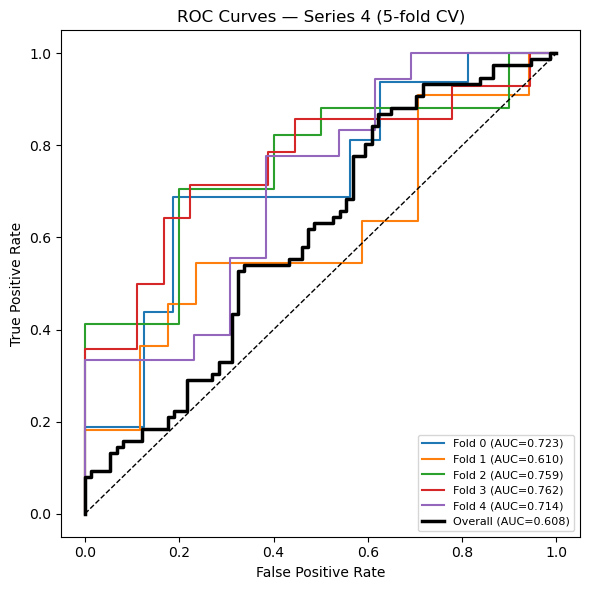

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

base_dir = "chemprop_series4_classification_withpreds"
data_path = "series4_processed_classification.csv"

# 讀原始資料 label
data = pd.read_csv(data_path)
data_small = data[["smiles", "bin_activity"]].copy()
data_small = data_small.rename(columns={"bin_activity": "y_true"})

# 存所有 fold 的資料（用來合併算 overall ROC）
all_folds_df = []

plt.figure(figsize=(6, 6))

for fold in range(5):
    preds_path = os.path.join(base_dir, f"fold_{fold}", "test_preds.csv")
    print(f"Reading {preds_path}")
    
    preds = pd.read_csv(preds_path)
    
    # 清理 smiles
    preds["smiles"] = preds["smiles"].str.strip("[]'")
    
    preds = preds.rename(columns={"bin_activity": "pred"})
    
    df = preds.merge(data_small, on="smiles", how="left")
    
    nan_count = df["y_true"].isna().sum()
    print(f"  fold {fold}: NaN in y_true = {nan_count}")
    
    df_clean = df.dropna(subset=["y_true"]).copy()
    df_clean["y_true"] = df_clean["y_true"].astype(int)
    
    # 存起來做 overall ROC 使用
    df_clean["fold"] = fold
    all_folds_df.append(df_clean)
    
    y_true = df_clean["y_true"]
    y_score = df_clean["pred"]   # ← 修正這裡
    
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    print(f"  fold {fold}: AUC = {roc_auc:.4f}")
    
    plt.plot(fpr, tpr, lw=1.5, label=f"Fold {fold} (AUC={roc_auc:.3f})")

# 合併後 overall ROC
all_df = pd.concat(all_folds_df, ignore_index=True)
y_true_all = all_df["y_true"]
y_score_all = all_df["pred"]

fpr_all, tpr_all, _ = roc_curve(y_true_all, y_score_all)
roc_auc_all = auc(fpr_all, tpr_all)
print(f"\nOverall (all folds combined) AUC = {roc_auc_all:.4f}")

# overall 粗線
plt.plot(fpr_all, tpr_all, lw=2.5, color="black", label=f"Overall (AUC={roc_auc_all:.3f})")

# 圖設定
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Series 4 (5-fold CV)")
plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

# 存圖（給 poster）
# plt.savefig("series4_5fold_roc.png", dpi=300, bbox_inches="tight")


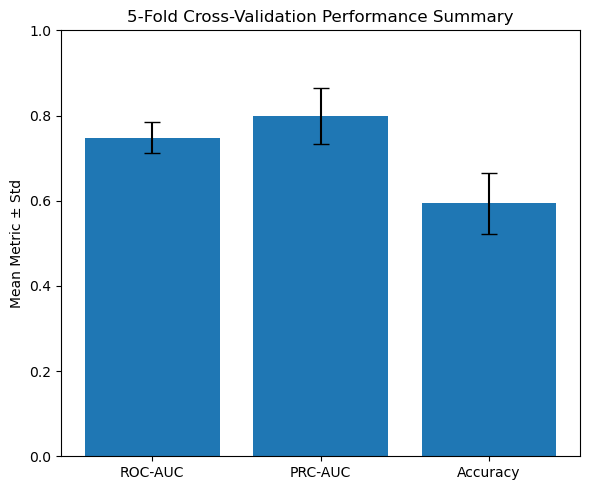

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

scores = pd.read_csv("chemprop_series4_classification_withpreds/test_scores.csv")

# 取出資料
mean_auc = scores["Mean auc"].values[0]
std_auc = scores["Standard deviation auc"].values[0]

mean_prc = scores["Mean prc-auc"].values[0]
std_prc = scores["Standard deviation prc-auc"].values[0]

mean_acc = scores["Mean accuracy"].values[0]
std_acc = scores["Standard deviation accuracy"].values[0]

metrics = ["ROC-AUC", "PRC-AUC", "Accuracy"]
means = [mean_auc, mean_prc, mean_acc]
errors = [std_auc, std_prc, std_acc]

plt.figure(figsize=(6,5))
plt.bar(metrics, means, yerr=errors, capsize=6)
plt.ylabel("Mean Metric ± Std")
plt.title("5-Fold Cross-Validation Performance Summary")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# 可存圖:
# plt.savefig("cv_performance_summary.png", dpi=300, bbox_inches="tight")


PRC-AUC = 0.7956


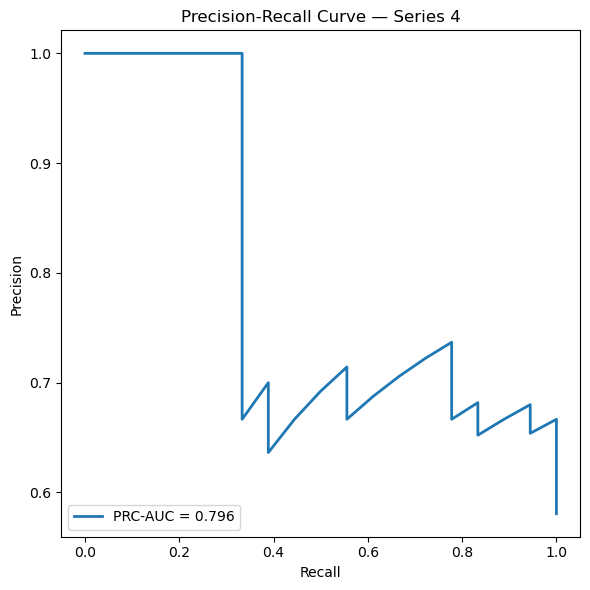


Confusion matrix (threshold=0.5):
[[ 0 13]
 [ 0 18]]


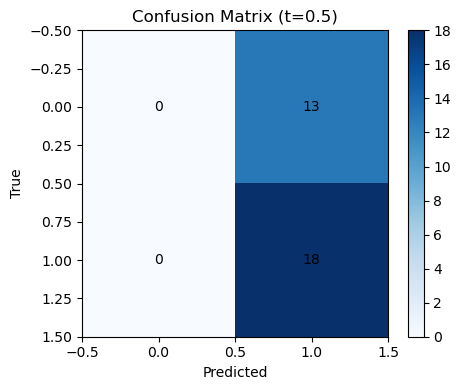


Decision table (0.3–0.7):
   threshold  TP  FP  FN  TN  precision  recall
0        0.3  18  13   0   0      0.581   1.000
1        0.4  18  13   0   0      0.581   1.000
2        0.5  18  13   0   0      0.581   1.000
3        0.6  11   5   7   8      0.688   0.611
4        0.7   0   0  18  13      0.000   0.000


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    confusion_matrix
)

# ===== 我們直接用上一段已經合併好的 df_clean =====
df_plot = df_clean.copy()

y_true = df_plot["y_true"].astype(int)
y_score = df_plot["pred"]

# ========= 1️⃣ PRC curve =========
precision, recall, pr_thresholds = precision_recall_curve(y_true, y_score)
prc_auc = average_precision_score(y_true, y_score)
print(f"PRC-AUC = {prc_auc:.4f}")

plt.figure(figsize=(6,6))
plt.plot(recall, precision, linewidth=2, label=f"PRC-AUC = {prc_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve — Series 4")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()
# plt.savefig("series4_overall_prc.png", dpi=300)

# ========= 2️⃣ Confusion Matrix (threshold = 0.5) =========
thresh = 0.5
y_pred = (y_score >= thresh).astype(int)
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion matrix (threshold=0.5):")
print(cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title(f"Confusion Matrix (t={thresh})")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
# plt.savefig("series4_confusion_matrix.png", dpi=300)

# ========= 3️⃣ Decision table =========
thresholds = np.arange(0.3, 0.71, 0.1)
results = []

for t in thresholds:
    yp = (y_score >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, yp).ravel()
    precision = tp / (tp + fp) if (tp+fp) > 0 else 0
    recall = tp / (tp + fn) if (tp+fn) > 0 else 0
    results.append([t, tp, fp, fn, tn, precision, recall])

dec_table = pd.DataFrame(results, columns=["threshold", "TP", "FP", "FN", "TN", "precision", "recall"])
print("\nDecision table (0.3–0.7):")
print(dec_table.round(3))

# dec_table.to_csv("decision_table_thresholds.csv", index=False)


In [12]:
ｈi


NameError: name 'hi' is not defined

In [17]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
conda install scikit-learn>=1.0




==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



Note: you may need to restart the kernel to use updated packages.


In [21]:
import sklearn
print(sklearn.__version__)


1.7.2


In [22]:
import sklearn
print("sklearn version:", sklearn.__version__)

from sklearn.metrics import mean_squared_error
import inspect
print("mean_squared_error signature:", inspect.signature(mean_squared_error))


sklearn version: 1.7.2
mean_squared_error signature: (y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')


In [25]:
!chemprop_train \
  --data_path series4_processed_regression.csv \
  --dataset_type regression \
  --target_columns norm_activity \
  --smiles_columns smiles \
  --save_dir series4_processed_regression_mse \
  --split_type scaffold_balanced \
  --num_folds 5 \
  --ensemble_size 3 \
  --metric mse \
  --save_preds \
  --epochs 80 \
  --gpu 0


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Command line
python /home/ec2-user/anaconda3/envs/python3/bin/chemprop_train --data_path series4_processed_regression.csv --dataset_type regression --target_columns norm_activity --smiles_columns smiles --save_dir series4_processed_regression_mse --split_type scaffold_balanced --num_folds 5 --ensemble_

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.097118
  2%|█                                           | 2/80 [00:01<00:53,  1.46it/s]Epoch 2

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.13it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.056752
  4%|█▋                                          | 3/80 [00:01<00:43,  1.79it/s]Epoch 3

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 9.4428e-01, PNorm = 34.0610, GNorm = 2.4391, lr_0 = 9.3712e-04

                                                                                
  0%|                                                 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.047806
 34%|██████████████▌                            | 27/80 [00:11<00:21,  2.44it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.19it/s]Loss = 6.0712e-01, PNorm = 34.6819, GNorm = 0.8958, lr_0 = 4.6143e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.067167
 35%|███████████████                            | 28/80 [00:12<00:21,  2.46it/s]Epoch 28

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.32it/s]
                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058115
 66%|████████████████████████████▍              | 53/80 [00:22<00:10,  2.48it/s]Epoch 53

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 4.6916e-01, PNorm = 35.2017, GNorm = 2.0602, lr_0 = 2.1418e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058440
 68%|█████████████████████████████              | 54/80 [00:22<00:10,  2.48it/s]Epoch 54

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.97it/s]Loss = 4.1988e-01, PNorm = 35.4515, GNorm = 1.4601, lr_0 = 1.0546e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055021
 98%|█████████████████████████████████████████▉ | 78/80 [00:32<00:00,  2.47it/s]Epoch 78

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.10it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.059899
 99%|██████████████████████████████████████████▍| 79/80 [00:32<00:00,  2.48it/s]Epoch 79

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.067862
 26%|███████████▎                               | 21/80 [00:08<00:23,  2.46it/s]Epoch 21

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.06it/s]Loss = 6.4901e-01, PNorm = 34.4802, GNorm = 2.9846, lr_0 = 5.5084e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.043399
 28%|███████████▊                               | 22/80 [00:09<00:23,  2.46it/s]Epoch 22

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]Loss = 5.2803e-01, PNorm = 34.9308, GNorm = 1.5976, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.054845
 57%|████████████████████████▋                  | 46/80 [00:19<00:14,  2.40it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.050835
 59%|█████████████████████████▎                 | 47/80 [00:19<00:13,  2.43it/s]Epoch 47

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.048633
 72%|███████████████████████████████▏           | 58/80 [00:23<00:08,  2.47it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.90it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.054657
 74%|███████████████████████████████▋           | 59/80 [00:24<00:08,  2.47it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]Loss = 4.6621e-01, PNorm = 35.1146, GNorm = 1.0121, lr_0 = 1.7941e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.17it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.071771
  1%|▌                                           | 1/80 [00:00<00:33,  2.33it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.20it/s]Loss = 1.0323e+00, PNorm = 34.0236, GNorm = 14.7345, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055438
  2%|█                                           | 2/80 [00:00<00:32,  2.41it/s]Epoch 2

 80%|████████████████████████████████████         | 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.85it/s]Loss = 8.0706e-01, PNorm = 34.3086, GNorm = 2.3891, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.054751
 18%|███████▌                                   | 14/80 [00:05<00:26,  2.48it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.26it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.041989
 19%|████████                                   | 15/80 [00:06<00:26,  2.50it/s]Epoch 15

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.044072
 34%|██████████████▌                            | 27/80 [00:11<00:22,  2.34it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.30it/s]Loss = 6.7901e-01, PNorm = 34.6291, GNorm = 3.8377, lr_0 = 4.6143e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055511
 35%|███████████████                            | 28/80 [00:11<00:21,  2.38it/s]Epoch 28

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.19it/s]Loss = 5.1978e-01, PNorm = 35.0746, GNorm = 1.0562, lr_0 = 2.2720e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.050317
 65%|███████████████████████████▉               | 52/80 [00:21<00:11,  2.50it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.061781
 66%|████████████████████████████▍              | 53/80 [00:21<00:10,  2.50it/s]Epoch 53

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055736
 80%|██████████████████████████████████▍        | 64/80 [00:26<00:06,  2.42it/s]Epoch 64

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058035
 81%|██████████████████████████████████▉        | 65/80 [00:26<00:06,  2.44it/s]Epoch 65

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]Loss = 4.4796e-01, PNorm = 35.2360, GNorm = 2.2929, lr_0 = 1.5029e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.11it/s]Loss = 8.6944e-01, PNorm = 34.1035, GNorm = 0.5357, lr_0 = 8.8339e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.085720
  8%|███▎                                        | 6/80 [00:02<00:30,  2.46it/s]Epoch 6

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.02it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.080475
  9%|███▊                                        | 7/80 [00:02<00:29,  2.47it/s]Epoch 7

 80%|████████████████████████████████████         | 4/

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.076243
 22%|█████████▋                                 | 18/80 [00:07<00:27,  2.27it/s]Epoch 18

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.39it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.061972
 24%|██████████▏                                | 19/80 [00:07<00:26,  2.31it/s]Epoch 19

 60%|███████████████████████████                  | 3/5 [00:00<00:00, 11.09it/s]Loss = 7.1703e-01, PNorm = 34.4526, GNorm = 1.9195, lr_0 = 5.8434e-04

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 12.31it/s]
                                                    

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.16it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.062413
 39%|████████████████▋                          | 31/80 [00:13<00:19,  2.48it/s]Epoch 31

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.06it/s]Loss = 5.8617e-01, PNorm = 34.7211, GNorm = 3.5237, lr_0 = 4.1003e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.062038
 40%|█████████████████▏                         | 32/80 [00:13<00:19,  2.49it/s]Epoch 32

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]Loss = 4.9805e-01, PNorm = 35.0937, GNorm = 6.0153, lr_0 = 2.0190e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.069501
 70%|██████████████████████████████             | 56/80 [00:23<00:09,  2.49it/s]Epoch 56

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.06it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.068798
 71%|██████████████████████████████▋            | 57/80 [00:23<00:09,  2.50it/s]Epoch 57

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.071071
 85%|████████████████████████████████████▌      | 68/80 [00:28<00:04,  2.49it/s]Epoch 68

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.072826
 86%|█████████████████████████████████████      | 69/80 [00:28<00:04,  2.50it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.26it/s]Loss = 4.5034e-01, PNorm = 35.2410, GNorm = 4.6202, lr_0 = 1.3355e-04

                                                                                
  0%|                                               

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda
Model 0 test mse = 0.074619                                                     
Building model 1
MoleculeModel(
  (encoder): MPN(
    (encoder): ModuleList(
      (0): MPNEncoder(
        (dropout): Dropout(p=0.0, inplace=False)
        (act_func): ReLU()
        (W_i): Linear(in_features=147, out_features=300, bias=False)
        (W_h): Linear(in_features=300, out_features=300, bias=False)
        (W_o): Linear(in_features=433, out_features=300, bias=True)
      )
    )

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.067938
 14%|█████▉                                     | 11/80 [00:04<00:27,  2.48it/s]Epoch 11

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.24it/s]Loss = 7.8875e-01, PNorm = 34.2428, GNorm = 1.1429, lr_0 = 7.4000e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.065256
 15%|██████▍                                    | 12/80 [00:04<00:27,  2.48it/s]Epoch 12

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.13it/s]
                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.064806
 45%|███████████████████▎                       | 36/80 [00:14<00:17,  2.45it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.062192
 46%|███████████████████▉                       | 37/80 [00:15<00:17,  2.47it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 5.8721e-01, PNorm = 34.8826, GNorm = 8.1297, lr_0 = 3.4348e-04

                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.068475
 76%|████████████████████████████████▊          | 61/80 [00:24<00:07,  2.49it/s]Epoch 61

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]Loss = 4.5589e-01, PNorm = 35.2458, GNorm = 2.1586, lr_0 = 1.6912e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.067576
 78%|█████████████████████████████████▎         | 62/80 [00:25<00:07,  2.49it/s]Epoch 62

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]
                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.35it/s]Loss = 9.3627e-01, PNorm = 34.0634, GNorm = 5.8192, lr_0 = 9.3712e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.089763
  5%|██▏                                         | 4/80 [00:01<00:30,  2.50it/s]Epoch 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.11it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.078723
  6%|██▊                                         | 5/80 [00:02<00:30,  2.50it/s]Epoch 5

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.064840
 21%|█████████▏                                 | 17/80 [00:07<00:25,  2.42it/s]Epoch 17

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 7.1868e-01, PNorm = 34.3776, GNorm = 1.2032, lr_0 = 6.1988e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.057183
 22%|█████████▋                                 | 18/80 [00:07<00:25,  2.43it/s]Epoch 18

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]Loss = 5.7846e-01, PNorm = 34.8891, GNorm = 3.9376, lr_0 = 3.0522e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.063514
 52%|██████████████████████▌                    | 42/80 [00:17<00:17,  2.18it/s]Epoch 42

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.82it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.065359
 54%|███████████████████████                    | 43/80 [00:17<00:16,  2.26it/s]Epoch 43

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.065969
 68%|█████████████████████████████              | 54/80 [00:22<00:10,  2.45it/s]Epoch 54

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.88it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.065691
 69%|█████████████████████████████▌             | 55/80 [00:22<00:10,  2.45it/s]Epoch 55

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 4.7535e-01, PNorm = 35.0925, GNorm = 4.9850, lr_0 = 2.0190e-04

                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.071432
 99%|██████████████████████████████████████████▍| 79/80 [00:32<00:00,  2.35it/s]Epoch 79

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.57it/s]Loss = 4.1126e-01, PNorm = 35.3050, GNorm = 1.7684, lr_0 = 1.0000e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.068894
100%|███████████████████████████████████████████| 80/80 [00:33<00:00,  2.42it/s]
Model 2 best validation mse = 0.057183 on epoch 17
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.enco

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.090503
 26%|███████████▎                               | 21/80 [00:08<00:23,  2.48it/s]Epoch 21

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 6.5438e-01, PNorm = 34.4712, GNorm = 0.7354, lr_0 = 5.5084e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.100455
 28%|███████████▊                               | 22/80 [00:08<00:23,  2.47it/s]Epoch 22

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.13it/s]Loss = 5.4389e-01, PNorm = 34.9417, GNorm = 5.2113, lr_0 = 2.7123e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.096412
 57%|████████████████████████▋                  | 46/80 [00:18<00:13,  2.48it/s]Epoch 46

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.093608
 59%|█████████████████████████▎                 | 47/80 [00:19<00:13,  2.48it/s]Epoch 47

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.092347
 72%|███████████████████████████████▏           | 58/80 [00:23<00:09,  2.36it/s]Epoch 58

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.95it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.100968
 74%|███████████████████████████████▋           | 59/80 [00:24<00:08,  2.40it/s]Epoch 59

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.78it/s]Loss = 4.9414e-01, PNorm = 35.1392, GNorm = 2.7078, lr_0 = 1.7941e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.05it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.104345
  1%|▌                                           | 1/80 [00:00<00:34,  2.31it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.17it/s]Loss = 1.0389e+00, PNorm = 34.0065, GNorm = 3.4689, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.124720
  2%|█                                           | 2/80 [00:00<00:32,  2.42it/s]Epoch 2

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]Loss = 7.7390e-01, PNorm = 34.2653, GNorm = 0.9613, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.097451
 18%|███████▌                                   | 14/80 [00:05<00:27,  2.44it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.093991
 19%|████████                                   | 15/80 [00:06<00:26,  2.46it/s]Epoch 15

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.098496
 32%|█████████████▉                             | 26/80 [00:10<00:22,  2.45it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.09it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.091224
 34%|██████████████▌                            | 27/80 [00:11<00:21,  2.47it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 6.3164e-01, PNorm = 34.5429, GNorm = 2.7251, lr_0 = 4.6143e-04

                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.091831
 64%|███████████████████████████▍               | 51/80 [00:21<00:11,  2.46it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]Loss = 5.3243e-01, PNorm = 34.9680, GNorm = 1.3459, lr_0 = 2.2720e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.091173
 65%|███████████████████████████▉               | 52/80 [00:21<00:11,  2.46it/s]Epoch 52

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]
                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.097757
 95%|████████████████████████████████████████▊  | 76/80 [00:31<00:01,  2.35it/s]Epoch 76

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.090509
 96%|█████████████████████████████████████████▍ | 77/80 [00:31<00:01,  2.39it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.91it/s]Loss = 4.5381e-01, PNorm = 35.2587, GNorm = 4.0977, lr_0 = 1.0546e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.090899
  9%|███▊                                        | 7/80 [00:02<00:29,  2.45it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]Loss = 8.0596e-01, PNorm = 34.1442, GNorm = 6.5010, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.091862
 10%|████▍                                       | 8/80 [00:03<00:29,  2.45it/s]Epoch 8

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.22it/s]Loss = 5.7435e-01, PNorm = 34.6577, GNorm = 1.2370, lr_0 = 4.1003e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.091286
 40%|█████████████████▏                         | 32/80 [00:13<00:19,  2.48it/s]Epoch 32

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.20it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.092481
 41%|█████████████████▋                         | 33/80 [00:13<00:18,  2.49it/s]Epoch 33

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.090115
 55%|███████████████████████▋                   | 44/80 [00:17<00:14,  2.49it/s]Epoch 44

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.93it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.094317
 56%|████████████████████████▏                  | 45/80 [00:18<00:14,  2.49it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]Loss = 5.1109e-01, PNorm = 34.9337, GNorm = 1.2811, lr_0 = 2.7123e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.48it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.093514
 71%|██████████████████████████████▋            | 57/80 [00:23<00:09,  2.31it/s]Epoch 57

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.58it/s]Loss = 4.5200e-01, PNorm = 35.1098, GNorm = 2.5356, lr_0 = 1.9032e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.093265
 72%|███████████████████████████████▏           | 58/80 [00:23<00:09,  2.35it/s]Epoch 58

 80%|████████████████████████████████████         | 

100%|███████████████████████████████████████| 313/313 [00:00<00:00, 4711.75it/s]
Total scaffolds = 139 | train scaffolds = 97 | val scaffolds = 16 | test scaffolds = 26
Label averages per scaffold, in decreasing order of scaffold frequency,capped at 10 scaffolds and 20 labels:
Scaffold 0
Task 0: count = 60 | target average = 0.566136


Scaffold 1
Task 0: count = 26 | target average = 0.792014


Scaffold 2
Task 0: count = 17 | target average = 0.636193


Scaffold 3
Task 0: count = 13 | target average = 0.473542


Scaffold 4
Task 0: count = 9 | target average = 0.579264


Scaffold 5
Task 0: count = 7 | target average = 0.418562


Scaffold 6
Task 0: count = 7 | target average = 0.523203


Scaffold 7
Task 0: count = 5 | target average = 0.750318


Scaffold 8
Task 0: count = 5 | target average = 0.212102


Scaffold 9
Task 0: count = 4 | target average = 0.318471


Total size = 313 | train size = 250 | val size = 31 | test size = 32
Fitting scaler
Building model 0
MoleculeModel(
  (encoder):

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.97it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.056805
 14%|█████▉                                     | 11/80 [00:04<00:27,  2.48it/s]Epoch 11

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.97it/s]Loss = 7.2691e-01, PNorm = 34.2604, GNorm = 0.6462, lr_0 = 7.4000e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.046907
 15%|██████▍                                    | 12/80 [00:04<00:27,  2.48it/s]Epoch 12

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]Loss = 6.1791e-01, PNorm = 34.6046, GNorm = 0.7717, lr_0 = 5.1926e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.047953
 30%|████████████▉                              | 24/80 [00:09<00:22,  2.47it/s]Epoch 24

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.047343
 31%|█████████████▍                             | 25/80 [00:10<00:22,  2.48it/s]Epoch 25

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.043823
 45%|███████████████████▎                       | 36/80 [00:14<00:18,  2.44it/s]Epoch 36

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.76it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.044767
 46%|███████████████████▉                       | 37/80 [00:15<00:17,  2.45it/s]Epoch 37

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.94it/s]Loss = 5.3560e-01, PNorm = 34.9138, GNorm = 0.7573, lr_0 = 3.4348e-04

                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.044252
 76%|████████████████████████████████▊          | 61/80 [00:24<00:07,  2.47it/s]Epoch 61

 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  9.38it/s]Loss = 4.4189e-01, PNorm = 35.2361, GNorm = 1.4532, lr_0 = 1.6912e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.041921
 78%|█████████████████████████████████▎         | 62/80 [00:25<00:08,  2.19it/s]Epoch 62

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]Loss = 9.6876e-01, PNorm = 34.0424, GNorm = 2.0913, lr_0 = 9.3712e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058032
  5%|██▏                                         | 4/80 [00:01<00:31,  2.45it/s]Epoch 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.03it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.052754
  6%|██▊                                         | 5/80 [00:02<00:30,  2.46it/s]Epoch 5

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.047733
 36%|███████████████▌                           | 29/80 [00:11<00:20,  2.47it/s]Epoch 29

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.20it/s]Loss = 6.4998e-01, PNorm = 34.6841, GNorm = 1.6031, lr_0 = 4.3497e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.052103
 38%|████████████████▏                          | 30/80 [00:12<00:20,  2.47it/s]Epoch 30

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.050080
 51%|██████████████████████                     | 41/80 [00:17<00:16,  2.34it/s]Epoch 41

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.68it/s]Loss = 5.6430e-01, PNorm = 34.9264, GNorm = 1.8324, lr_0 = 3.0522e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.047425
 52%|██████████████████████▌                    | 42/80 [00:17<00:16,  2.36it/s]Epoch 42

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.10it/s]
                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.046697
 82%|███████████████████████████████████▍       | 66/80 [00:27<00:05,  2.47it/s]Epoch 66

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.87it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.048373
 84%|████████████████████████████████████       | 67/80 [00:27<00:05,  2.47it/s]Epoch 67

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]Loss = 4.8619e-01, PNorm = 35.2641, GNorm = 3.0261, lr_0 = 1.4167e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.061579
 11%|████▉                                       | 9/80 [00:03<00:28,  2.47it/s]Epoch 9

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]Loss = 7.6985e-01, PNorm = 34.2008, GNorm = 2.4385, lr_0 = 7.8500e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.046597
 12%|█████▍                                     | 10/80 [00:04<00:28,  2.47it/s]Epoch 10

 80%|████████████████████████████████████         | 4

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.83it/s]Loss = 6.8042e-01, PNorm = 34.4753, GNorm = 1.5473, lr_0 = 5.5084e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.050360
 28%|███████████▊                               | 22/80 [00:09<00:25,  2.29it/s]Epoch 22

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.98it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.049490
 29%|████████████▎                              | 23/80 [00:09<00:24,  2.34it/s]Epoch 23

 80%|████████████████████████████████████         | 


 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.92it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.044561
 59%|█████████████████████████▎                 | 47/80 [00:19<00:13,  2.46it/s]Epoch 47

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.76it/s]Loss = 5.4220e-01, PNorm = 34.9804, GNorm = 1.0824, lr_0 = 2.5568e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.045607
 60%|█████████████████████████▊                 | 48/80 [00:19<00:13,  2.45it/s]Epoch 48

 80%|████████████████████████████████████         |

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.84it/s]Loss = 4.8112e-01, PNorm = 35.1416, GNorm = 1.6891, lr_0 = 1.7941e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.042024
 75%|████████████████████████████████▎          | 60/80 [00:24<00:08,  2.41it/s]Epoch 60

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.043315
 76%|████████████████████████████████▊          | 61/80 [00:25<00:07,  2.44it/s]Epoch 61

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.043371
 90%|██████████████████████████████████████▋    | 72/80 [00:29<00:03,  2.45it/s]Epoch 72

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.66it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.043264
 91%|███████████████████████████████████████▏   | 73/80 [00:30<00:02,  2.44it/s]Epoch 73

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]Loss = 4.4517e-01, PNorm = 35.2847, GNorm = 5.4305, lr_0 = 1.1867e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.07it/s]Loss = 6.9570e-01, PNorm = 34.2895, GNorm = 0.8536, lr_0 = 6.9757e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.056606
 18%|███████▌                                   | 14/80 [00:05<00:26,  2.47it/s]Epoch 14

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.11it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.057080
 19%|████████                                   | 15/80 [00:06<00:26,  2.48it/s]Epoch 15

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055777
 32%|█████████████▉                             | 26/80 [00:10<00:21,  2.47it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.10it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055956
 34%|██████████████▌                            | 27/80 [00:11<00:21,  2.47it/s]Epoch 27

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.12it/s]Loss = 5.8929e-01, PNorm = 34.6165, GNorm = 6.0138, lr_0 = 4.6143e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.86it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.057901
 49%|████████████████████▉                      | 39/80 [00:16<00:17,  2.35it/s]Epoch 39

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.72it/s]Loss = 5.7054e-01, PNorm = 34.8262, GNorm = 5.2252, lr_0 = 3.2378e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055227
 50%|█████████████████████▌                     | 40/80 [00:16<00:16,  2.38it/s]Epoch 40

 80%|████████████████████████████████████         | 

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.26it/s]Loss = 4.4368e-01, PNorm = 35.1325, GNorm = 2.7837, lr_0 = 1.5943e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.052952
 80%|██████████████████████████████████▍        | 64/80 [00:26<00:06,  2.48it/s]Epoch 64

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.14it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.053881
 81%|██████████████████████████████████▉        | 65/80 [00:26<00:06,  2.49it/s]Epoch 65

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.052016
 95%|████████████████████████████████████████▊  | 76/80 [00:31<00:01,  2.45it/s]Epoch 76

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.052588
 96%|█████████████████████████████████████████▍ | 77/80 [00:31<00:01,  2.46it/s]Epoch 77

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.04it/s]Loss = 4.1334e-01, PNorm = 35.2405, GNorm = 2.1750, lr_0 = 1.0546e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.08it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.059565
  9%|███▊                                        | 7/80 [00:02<00:29,  2.46it/s]Epoch 7

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.19it/s]Loss = 8.3050e-01, PNorm = 34.1374, GNorm = 1.0861, lr_0 = 8.3275e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.060620
 10%|████▍                                       | 8/80 [00:03<00:29,  2.47it/s]Epoch 8

 80%|████████████████████████████████████         | 4/

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.17it/s]Loss = 5.9750e-01, PNorm = 34.6728, GNorm = 1.5255, lr_0 = 4.1003e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058595
 40%|█████████████████▏                         | 32/80 [00:13<00:19,  2.48it/s]Epoch 32

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.18it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.059754
 41%|█████████████████▋                         | 33/80 [00:13<00:18,  2.49it/s]Epoch 33

 80%|████████████████████████████████████         | 

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.059198
 55%|███████████████████████▋                   | 44/80 [00:18<00:14,  2.48it/s]Epoch 44

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058682
 56%|████████████████████████▏                  | 45/80 [00:18<00:14,  2.48it/s]Epoch 45

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]Loss = 5.7092e-01, PNorm = 34.8927, GNorm = 3.8013, lr_0 = 2.7123e-04

                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.056964
 86%|█████████████████████████████████████      | 69/80 [00:28<00:04,  2.48it/s]Epoch 69

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]Loss = 4.8233e-01, PNorm = 35.1446, GNorm = 4.0544, lr_0 = 1.3355e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058499
 88%|█████████████████████████████████████▋     | 70/80 [00:28<00:04,  2.48it/s]Epoch 70

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.96it/s]
                                                                                
  0%|                                               

  0%|                                                    | 0/80 [00:00<?, ?it/s]Epoch 0

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.99it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.069878
  1%|▌                                           | 1/80 [00:00<00:32,  2.44it/s]Epoch 1

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.05it/s]Loss = 9.8410e-01, PNorm = 34.0207, GNorm = 3.8064, lr_0 = 9.9411e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.060392
  2%|█                                           | 2/8

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.058889
 31%|█████████████▍                             | 25/80 [00:10<00:22,  2.46it/s]Epoch 25

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.00it/s]Loss = 6.3514e-01, PNorm = 34.5322, GNorm = 2.1359, lr_0 = 4.8949e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.056059
 32%|█████████████▉                             | 26/80 [00:11<00:21,  2.47it/s]Epoch 26

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]
                                                                                
  0%|                                               

  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055865
 62%|██████████████████████████▉                | 50/80 [00:20<00:12,  2.48it/s]Epoch 50

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 13.77it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.056702
 64%|███████████████████████████▍               | 51/80 [00:21<00:11,  2.48it/s]Epoch 51

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.01it/s]Loss = 4.7661e-01, PNorm = 34.9928, GNorm = 2.6425, lr_0 = 2.2720e-04

                                                                                
  0%|                                               

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]Loss = 4.2049e-01, PNorm = 35.2083, GNorm = 4.2790, lr_0 = 1.1187e-04

                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055536
 95%|████████████████████████████████████████▊  | 76/80 [00:31<00:01,  2.39it/s]Epoch 76

 80%|████████████████████████████████████         | 4/5 [00:00<00:00, 14.15it/s]
                                                                                
  0%|                                                     | 0/1 [00:00<?, ?it/s]
                                                                                Validation mse = 0.055107
 96%|█████████████████████████████████████████▍ | 77/80 [00:31<00:01,  2.41it/s]Epoch 77

 80%|████████████████████████████████████         | 

In [30]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# 原始完整資料（有真實的 norm_activity）
df_all = pd.read_csv("series4_processed_regression.csv")

# Chemprop 存出的 test 預測
df_test = pd.read_csv("series4_processed_regression_mse/fold_0/test_preds.csv")

print("df_all columns:", df_all.columns)
print("df_test columns:", df_test.columns)
print("df_test shape:", df_test.shape)




df_all columns: Index(['smiles', 'norm_activity'], dtype='object')
df_test columns: Index(['smiles', 'norm_activity'], dtype='object')
df_test shape: (32, 2)


In [31]:
merged = df_test.merge(
    df_all[["smiles", "norm_activity"]],
    on="smiles",
    suffixes=("_pred", "_true")
)

print(merged.columns)
merged.head()


Index(['smiles', 'norm_activity_pred', 'norm_activity_true'], dtype='object')


Empty DataFrame
Columns: [smiles, norm_activity_pred, norm_activity_true]
Index: []

In [33]:
y_true = merged["norm_activity_true"].values
y_pred = merged["norm_activity_pred"].values

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.